# Assignment 3 - LNG Terminals & Electricity Markets
## Task 1: LNG Terminals [30 points]
#### Required Tools: geopandas, pandas, matplotlib, cartopy
##### In this task, you will analyse data from the Global Gas Infrastructure Tracker published by Global Energy Monitor. This dataset includes data on liquefied natural gas (LNG) import and export terminals around the globe. You can find the dataset here:
##### File: https://tubcloud.tu-berlin.de/s/QWXsKqHTnfWxRzj/download/GEM-GGIT-LNG-Terminals-July2022.xlsx
##### [2 points] (a) Read the Excel table into a pandas.DataFrame using the pd.read_Excel function. Make sure to identify the following strings as NaN values when reading in the file: “Unknown”, “TBD”, “–”, ” “.

In [15]:
import pandas as pd
import geopandas as gpd
#import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import cartopy
import cartopy.crs as ccrs

#import warnings


In [16]:
df = pd.read_excel("GEM-GGIT-LNG-Terminals-July2022.xlsx", na_values=["nan", "Nan", "Unknown", "TBD", "–", "", ' ', 'nan', '--'], index_col = "ComboID",
                  thousands=",")
df.head(5)

,TerminalID,ProjectID,Country,Region,Wiki,TerminalName,UnitName,OtherEnglishNames,Owner,Parent,...,State/Province,Latitude,Longitude,Accuracy,Floating,FID,FIDYear,OtherLanguageName,PowerPlantsSupplied,OtherLanguageWikiPage
ComboID,,,,,,,,,,,,,,,,,,,,,
T020501,T0205,1,United States,North America,https://www.gem.wiki/Fourchon_LNG_Terminal,Fourchon LNG Terminal,Phase 1,Gulf Coast LNG Terminal,Fourchon LNG LLC [100.00%],Energy World [100.00%],...,Louisiana,29.105833,-90.194444,approximate,NaN,Pre-FID,NaN,NaN,NaN,NaN
T020502,T0205,2,United States,North America,https://www.gem.wiki/Fourchon_LNG_Terminal,Fourchon LNG Terminal,Phase 2,Gulf Coast LNG Terminal,Fourchon LNG LLC [100.00%],Energy World [100.00%],...,Louisiana,29.105833,-90.194444,approximate,NaN,Pre-FID,NaN,NaN,NaN,NaN
T020601,T0206,1,United States,North America,https://www.gem.wiki/Alaska_South_Central_LNG_...,Alaska LNG Terminal,T1,Alaska South Central LNG Terminal,Alaska Gasline Development Corporation [100.00%],State of Alaska [100.00%],...,Alaska,60.707778,-151.262778,approximate,NaN,Pre-FID,2021,NaN,NaN,NaN
T020602,T0206,2,United States,North America,https://www.gem.wiki/Alaska_South_Central_LNG_...,Alaska LNG Terminal,T2,Alaska South Central LNG Terminal,Alaska Gasline Development Corporation [100.00%],State of Alaska [100.00%],...,Alaska,60.707778,-151.262778,approximate,NaN,Pre-FID,2021,NaN,NaN,NaN
T020603,T0206,3,United States,North America,https://www.gem.wiki/Alaska_South_Central_LNG_...,Alaska LNG Terminal,T3,Alaska South Central LNG Terminal,Alaska Gasline Development Corporation [100.00%],State of Alaska [100.00%],...,Alaska,60.707778,-151.262778,approximate,NaN,Pre-FID,2021,NaN,NaN,NaN


#### [2 points] (b) Using the coordinates included in the dataset, build a geopandas.GeoDataFrame.

In [17]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf.head(2)

,TerminalID,ProjectID,Country,Region,Wiki,TerminalName,UnitName,OtherEnglishNames,Owner,Parent,...,Latitude,Longitude,Accuracy,Floating,FID,FIDYear,OtherLanguageName,PowerPlantsSupplied,OtherLanguageWikiPage,geometry
ComboID,,,,,,,,,,,,,,,,,,,,,
T020501,T0205,1,United States,North America,https://www.gem.wiki/Fourchon_LNG_Terminal,Fourchon LNG Terminal,Phase 1,Gulf Coast LNG Terminal,Fourchon LNG LLC [100.00%],Energy World [100.00%],...,29.105833,-90.194444,approximate,NaN,Pre-FID,NaN,NaN,NaN,NaN,POINT (-90.19444 29.10583)
T020502,T0205,2,United States,North America,https://www.gem.wiki/Fourchon_LNG_Terminal,Fourchon LNG Terminal,Phase 2,Gulf Coast LNG Terminal,Fourchon LNG LLC [100.00%],Energy World [100.00%],...,29.105833,-90.194444,approximate,NaN,Pre-FID,NaN,NaN,NaN,NaN,POINT (-90.19444 29.10583)


#### [2 points] (c) Convert the capacities given in Mtpa (mega tonnes per year) into TWh and store the resulting values in a new column “CapacityInTWh”.

In [18]:
# Using 13 kWh/kg <-> 13 MWh/t <-> 13 *10^6 MWh/Mt <-> 13 TWh/Mt
gdf.loc[:, "CapacityInTWh"] = gdf.CapacityInMtpa.apply(lambda x: x*13)

#### [2 points] (d) How many LNG terminals are included in the dataset and what is the median capacity in TWh?

In [19]:
number_of_terminals = len(gdf.groupby("TerminalID").groups)
print(f"There are {number_of_terminals} Terminals if every terminal has a unique ID")
print(f"The Terminals have a median capacity of {gdf.CapacityInTWh.mean()} TWh/year")


There are 730 Terminals if every terminal has a unique ID
The Terminals have a median capacity of 53.733292568203204 TWh/year


#### [2 points] (e) What share of import terminals is floating?

In [20]:
import_terminals = gdf.groupby(["Import/Export"]).get_group('Import')
number_import = int(len(import_terminals))
import_floating = gdf.groupby(["Import/Export", "Floating"]).get_group(('Import', 'yes'))
number_of_import_floating = int(len(import_floating))
print(f"{number_of_import_floating*100/number_import}% of import Terminals in the Dataset are floating Terminals")

29.042904290429043% of import Terminals in the Dataset are floating Terminals


#### [2 points] (f) Print the information of the oldest operating LNG terminal. In which country is it located?

In [23]:
oldest = gdf.query('Status == "Operating"').sort_values(by = "StartYear1").iloc[0]
print(f"The oldest LNG Terminal is located in {oldest.Country} with following 'information':")
oldest


The oldest LNG Terminal is located in Japan with following 'information':


TerminalID                                                           T0503
ProjectID                                                                0
Country                                                              Japan
Region                                                           East Asia
Wiki                             https://www.gem.wiki/Negishi_LNG_Terminal
TerminalName                                          Negishi LNG Terminal
UnitName                                                               NaN
OtherEnglishNames                                                      NaN
Owner                              JERA [unknown %]; Tokyo Gas [unknown %]
Parent                   Chubu Electric Power [unknown %]; Tokyo Electr...
Status                                                           Operating
StartYear1                                                          1969.0
StartYear2                                                             NaN
StartYear3               

#### [2 points] (g) Create a bar plot outlining the 10 countries with the largest LNG terminal capacity.

<AxesSubplot: ylabel='LNG Capacity [TWh/a]'>

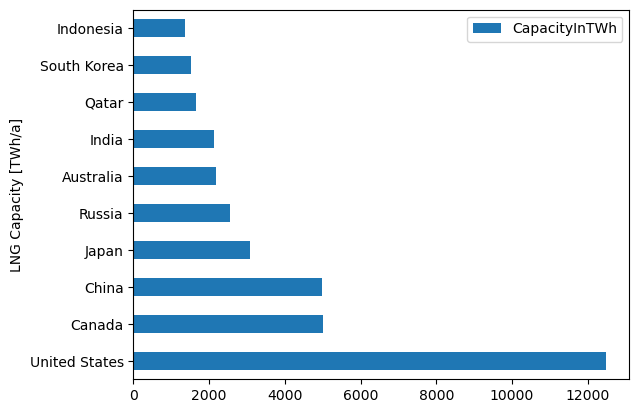

In [25]:
gdf.groupby('Country').agg({'CapacityInTWh': 'sum'}).sort_values(by="CapacityInTWh",ascending=False)[:10].plot.barh(ylabel="LNG Capacity [TWh/a]")

#### [2 points] (h) Create a bar plot outlining the LNG terminal capacity per status code.

<AxesSubplot: ylabel='LNG Capacity [TWh/a]'>

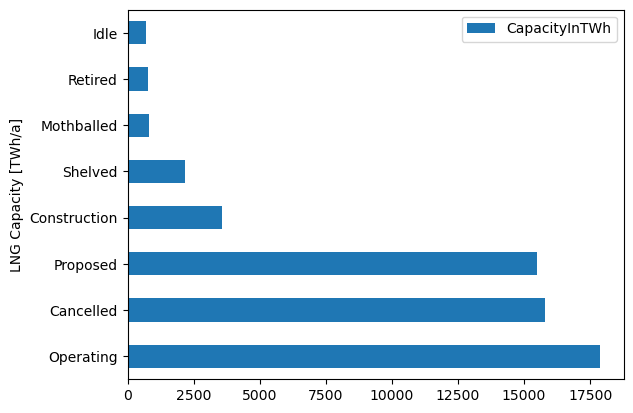

In [24]:
gdf.groupby('Status').agg({'CapacityInTWh': 'sum'}).sort_values(by="CapacityInTWh",ascending=False)[:10].plot.barh(ylabel="LNG Capacity [TWh/a]")

#### [2 points] (i) Create a table of the German LNG terminals including information on the name, status, capacity, owner, whether it is floating, and sorted by aspired start year.

In [11]:
gdf.query("Country == 'Germany'").sort_values(by="StartYear1").loc[:, ("TerminalName", "Status", "CapacityInTWh", "Owner", "Floating", "StartYear1", "FID")]


,TerminalName,Status,CapacityInTWh,Owner,Floating,StartYear1,FID
ComboID,,,,,,,
T107700,Lubmin FSRU,Proposed,43.03,Deutsche Regas [unknown %],yes,2021.0,NaN
T045800,Wilhelmshaven FSRU,Construction,71.63,Uniper [100.00%],yes,2022.0,NaN
T072200,Rostock LNG Terminal,Cancelled,3.90,Fluxys [unknown %]; Novatek [unknown %],NaN,2023.0,Pre-FID
T100000,Wilhelmshaven NWO FSRU Terminal,Proposed,86.06,Nord West Ölleitung [400.00%],NaN,2023.0,NaN
T108600,Stade FSRU,Proposed,NaN,Unknown [unknown %],yes,2023.0,NaN
T046000,Brunsbüttel FSRU,Proposed,76.44,German LNG Terminal [300.00%],NaN,2024.0,Pre-FID
T100100,TES Wilhelmshaven LNG Terminal,Proposed,152.88,Tree Energy Solutions [100.00%],NaN,2025.0,Pre-FID
T072100,Stade LNG Terminal,Proposed,127.14,Buss Group [unknown %]; Dow Chemical [unknown ...,NaN,2026.0,Pre-FID
T108400,Brunsbüttel LNG Terminal,Proposed,76.44,Gasunie [unknown %]; Oiltanking [unknown %]; V...,NaN,2026.0,Pre-FID


#### [2 points] (j) Create a line chart depicting the number of new LNG terminals per year. Include a vertical line for the year 2022 for orientation.

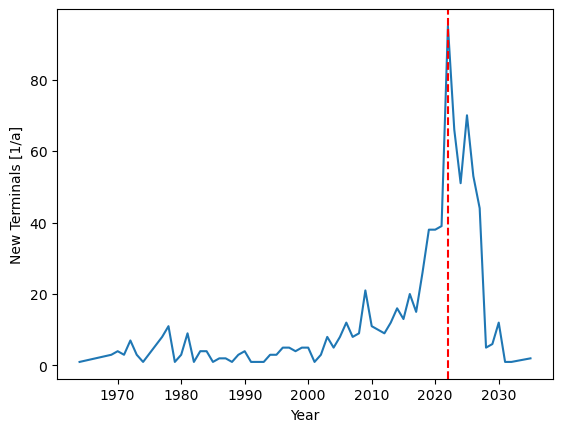

In [12]:
# Grouping Terminals by start year -> Groups represent new Terminals in the year
gdf.groupby('StartYear1').agg(lambda x: len(x)).TerminalID.plot(ylabel="New Terminals [1/a]", xlabel="Year")
plt.axvline(x=2022, color='red', linestyle='--')

#### [5 points] (k) Write a function that takes an extract of the LNG terminals in the geopandas.GeoDataFrame and plots it with the following characteristics:
• Mercator projection with coastlines displayed.

• Marker size proportional to capacity (no legend for size necessary)

• Colors according to status, including a legend.

• Semi-transparent markers (alpha=0.6).

In [33]:
def plot_map(terminals: gpd.GeoDataFrame):
    fig = plt.figure(figsize=(15,15))
    terminals.crs="epsg:4326"
    # Manipulating axes to increase readability: 
    ax = plt.axes(projection=ccrs.Mercator())
    # Beautify
    ax.coastlines()
    # Also adding colors for readability
    ax.add_feature(cartopy.feature.OCEAN, color='azure')
    ax.add_feature(cartopy.feature.LAND, color='cornsilk')
    # Borders
    ax.add_feature(cartopy.feature.BORDERS, color='grey', linewidth=0.5)
    terminals.to_crs(ccrs.Mercator()).plot(ax = ax,
                   column='Status',
                   markersize=terminals.CapacityInTWh,
                   legend=True,
                   alpha=.6,
                         )

#### [5 points] (l) Use the function you created to plot:
• all LNG terminals

• only LNG import terminals

• only LNG export terminals

• only future LNG import terminals (i.e. start year after 2022)

• only floating LNG terminals

All LNG Terminals:


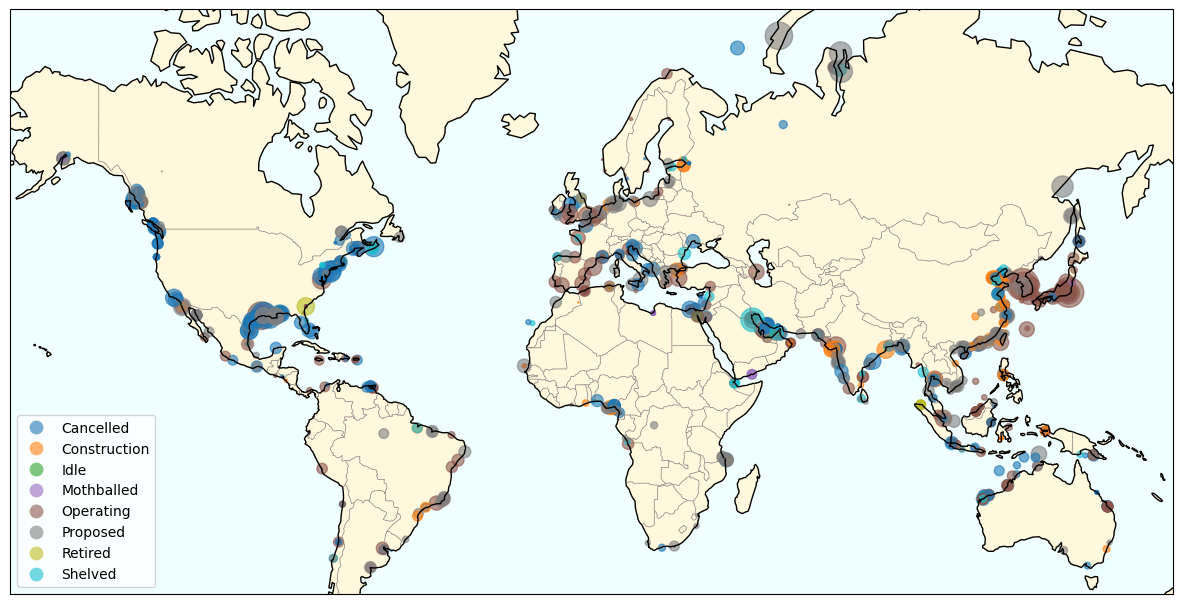

In [35]:
print("All LNG Terminals:")
plot_map(gdf)
import warnings
warnings.filterwarnings(action="ignore")


Only import terminals:


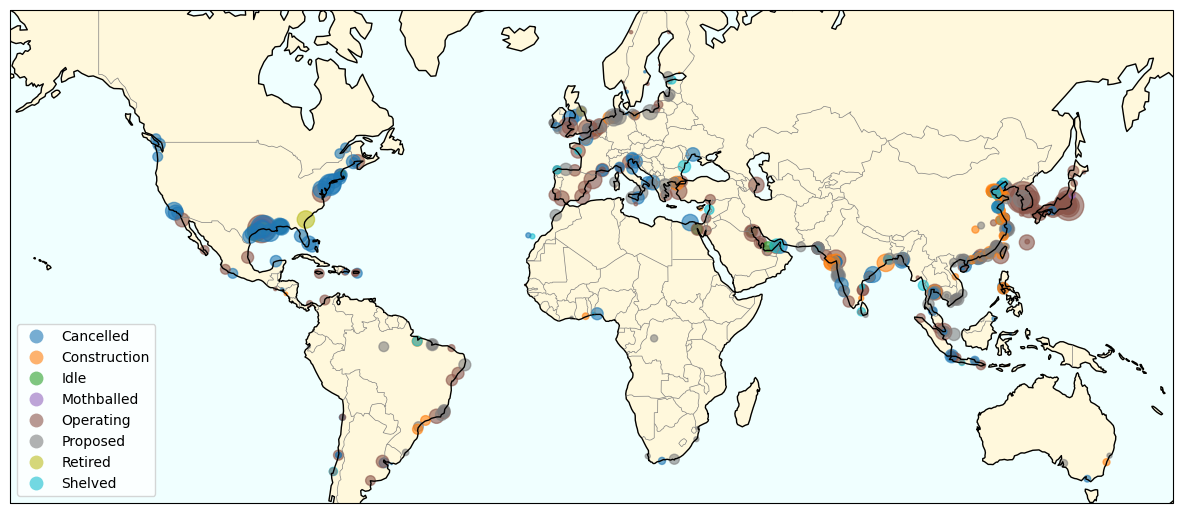

In [36]:
gdf.rename(columns = {'Import/Export':'IE'}, inplace = True)
print("Only import terminals:")
plot_map(gdf.query("IE == 'Import'"))

Only Export terminals:


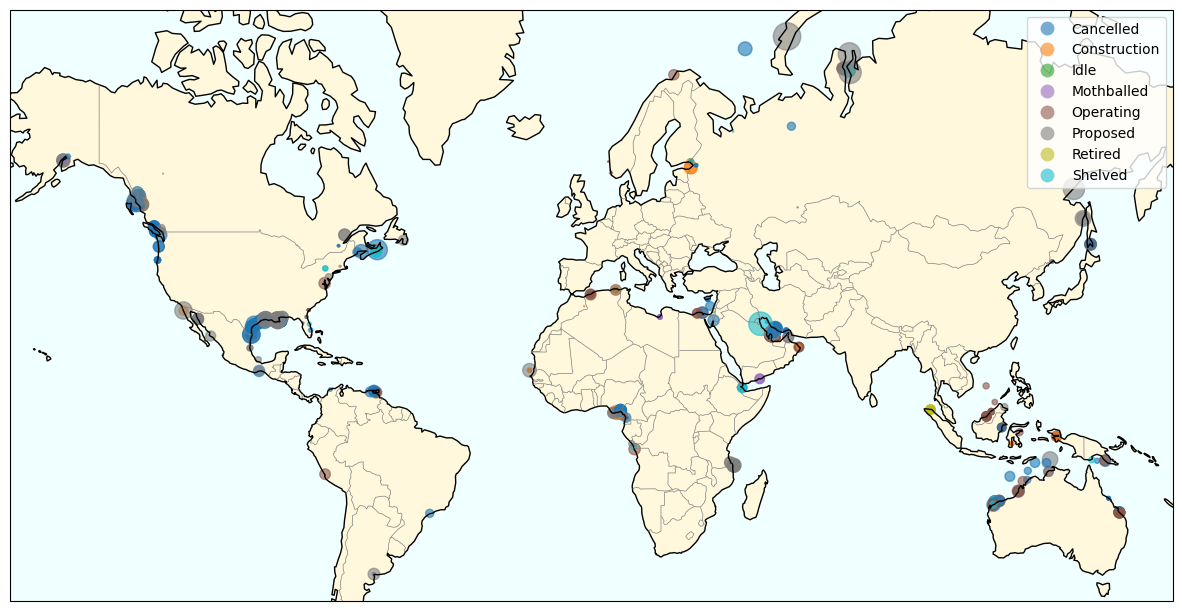

In [37]:
print("Only Export terminals:")
plot_map(gdf.query("IE == 'Export'"))

Only terminals with higher start year than 2022:


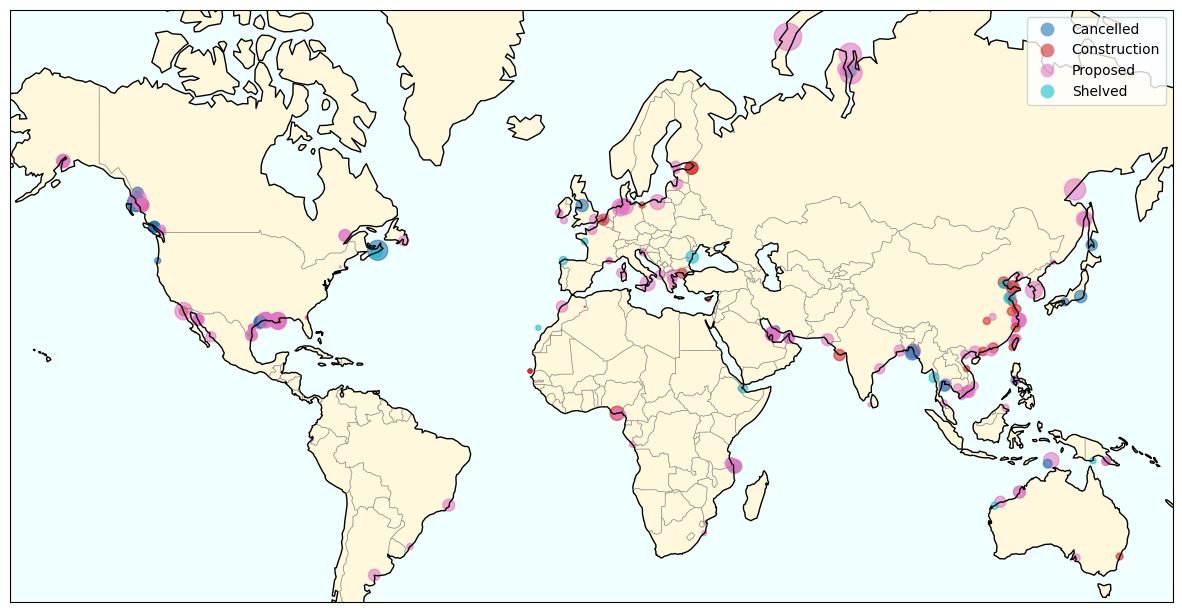

In [38]:
print("Only terminals with higher start year than 2022:")
plot_map(gdf.query("StartYear1 > 2022"))

Only floating terminals:


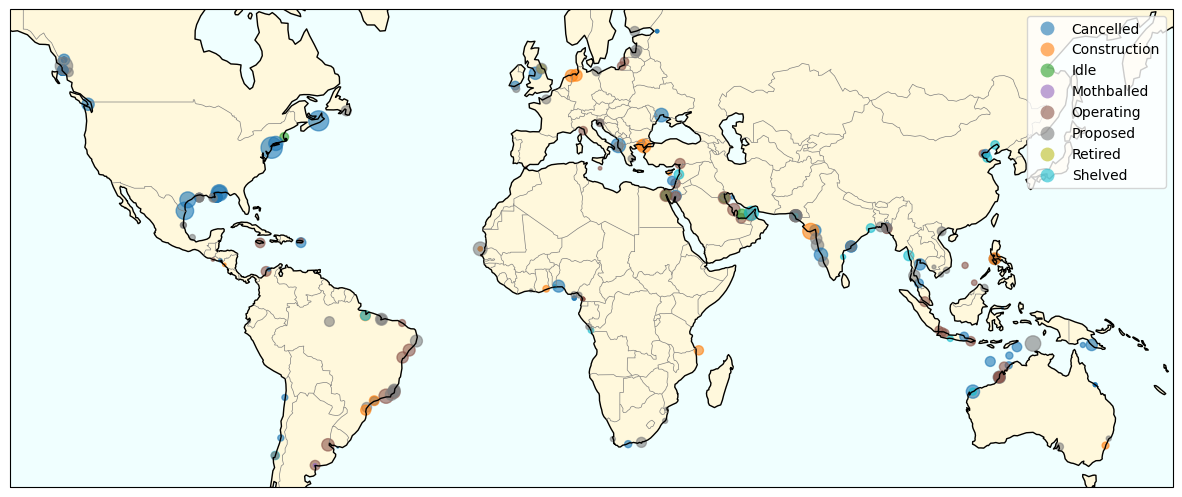

In [39]:
print("Only floating terminals:")
plot_map(gdf.query("Floating == 'yes'")) # There must be some issue either in projection, coordinates or the Dataset.
# I expect Floating Terminals to be on Water(Ocean), yet some seem to be on Land

## Task 2: Merit Order [42 points]
### Required Tools: pandas, matplotlib
#### In this task you are asked to build and plot merit order curves for the German day-ahead electricity market given a dataset on operational power plants (link 1) and some additional carrier-specific data (link 2):
##### • https://tubcloud.tu-berlin.de/s/P9qPttqFg3ciKEy/download/powerplants.csv
##### • https://tubcloud.tu-berlin.de/s/XjtnxyNPtPP6eDQ/download/technologies.csv
#### The attributes contained in the two CSV files have the following units:

| Attribute     | Description                        | Unit                           |
|---------------|------------------------------------|--------------------------------|
| carrier       | technology                         | –                              |
| co2_emissions | specific carbon dioxide emissions  | t/MWh (thermal)                |
| color         | HEX color code                     | –                              |
| efficiency    | conversion efficiency               | MWh (electric) / MWh (thermal) |
| marginal_cost | STMGC                              | €/MWh (electric)               |
| p_max_pu      | capacity factor in particular hour | p.u.                           |
| p_nom         | rated/nominal capacity             | MW                             |

Assume that all storage has sufficient energy filling levels to dispatch at full capacity.

#### [2 points] (a) Read the provided datasets into two separate pandas.DataFrame.

In [93]:
plants = pd.read_csv("powerplants.csv", index_col = "Unnamed: 0")
techs = pd.read_csv("technologies.csv", index_col = "Carrier")

### [4 points] (b) Plot a pie chart with the distribution of capacities per technology. Color the chart segments according to the given colors, label the segments with the carrier and its capacity share in % rounded to one decimal point.

<AxesSubplot: title={'center': 'Share of Capacity to total capacity'}>

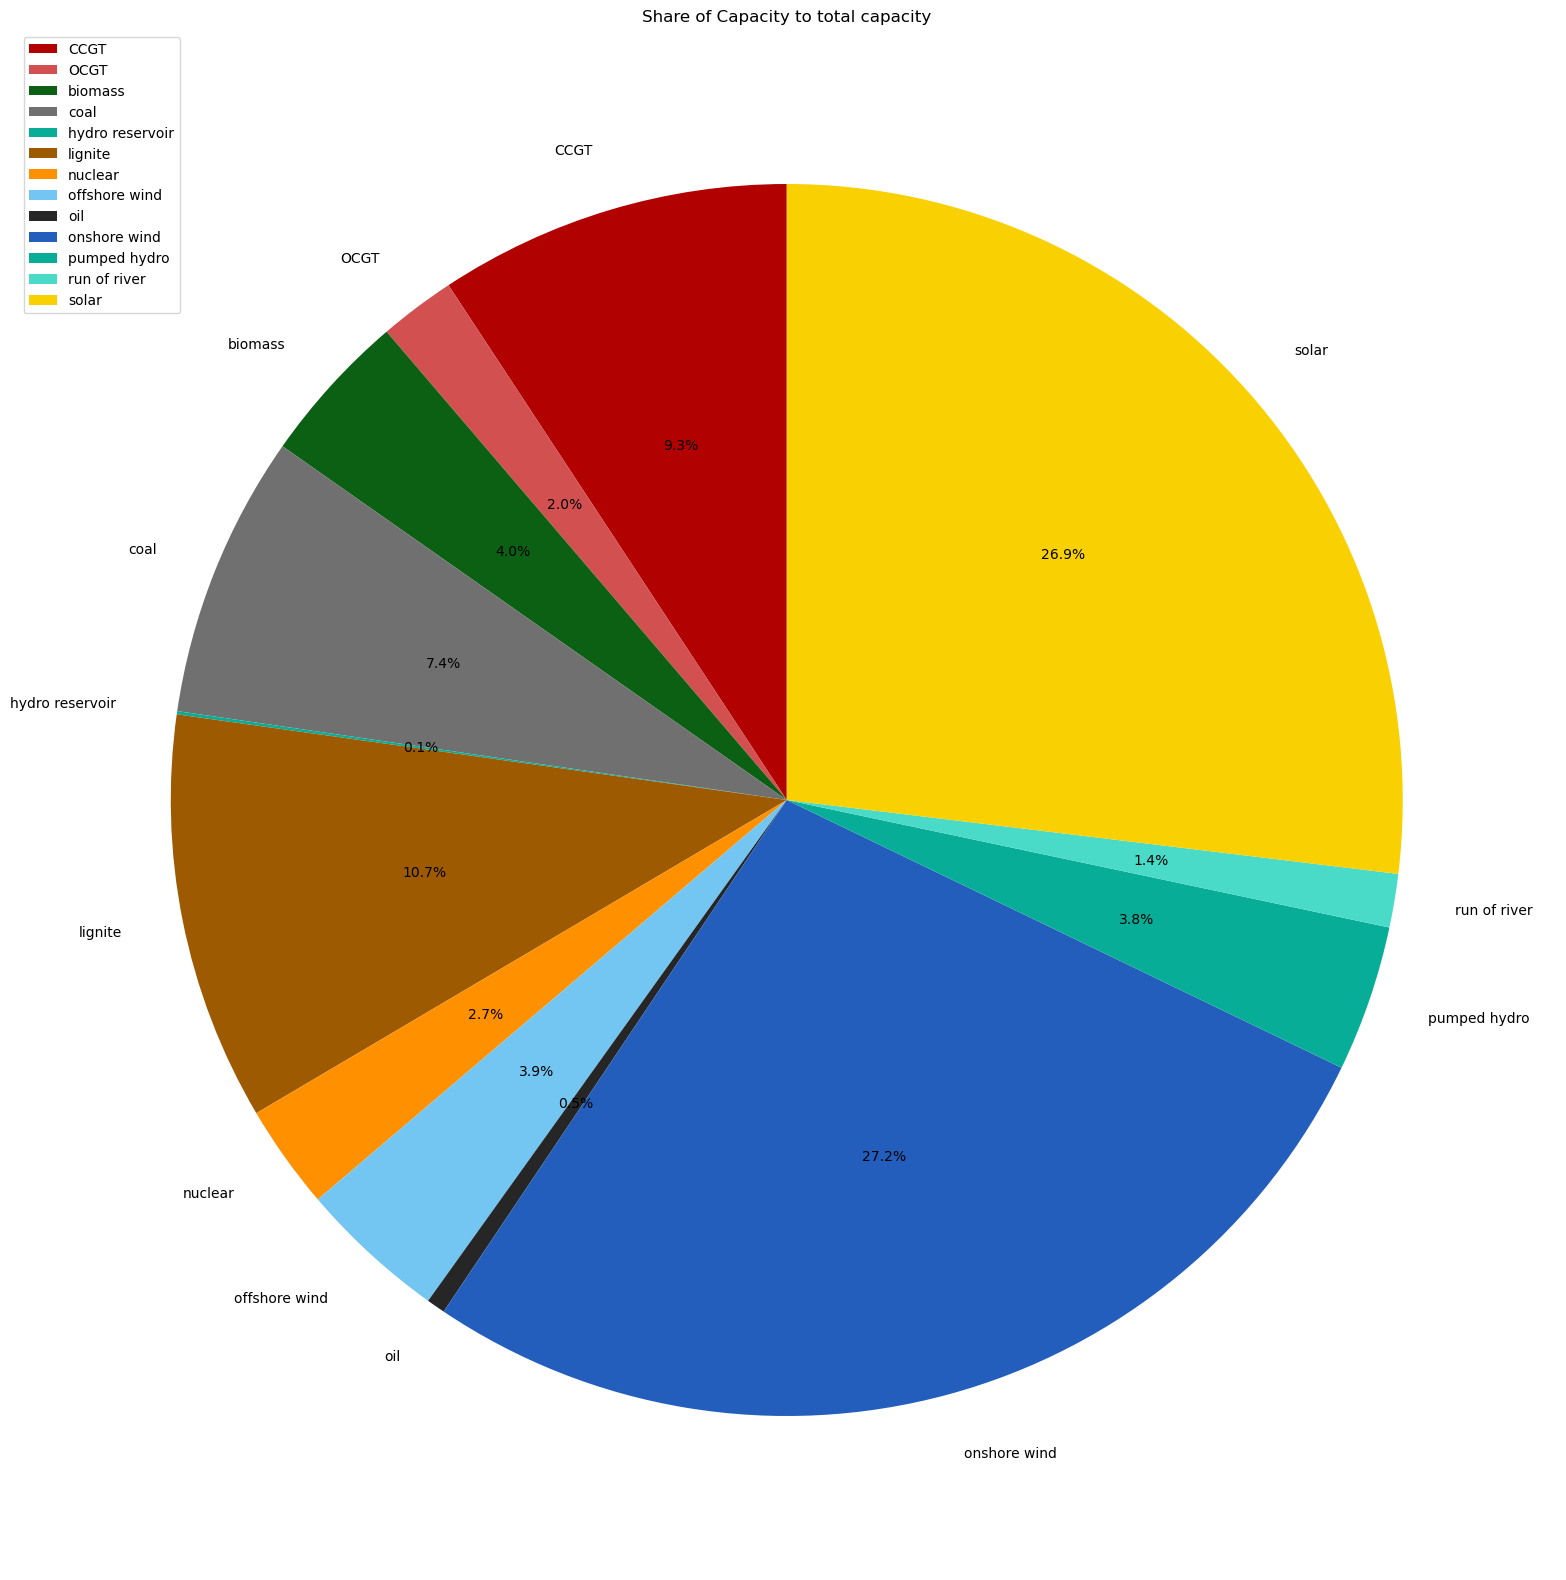

In [98]:
#plants.plot(kind="pie", y="p_nom")
plants2 = plants.rename(columns = {"carrier":"Carrier"})
carriers = plants2.groupby('Carrier').agg({'p_nom': 'sum'})
carriers.loc[:, "color"] = carriers.index.map(lambda x: techs.loc[x,"color"])
#carriers.loc[:, "expl"] = carriers.index.map(lambda x: 0.05)

carriers.plot.pie(
    y="p_nom", 
    autopct='%1.1f%%',startangle=90, figsize=(30,20),
    colors = carriers.color, 
    rot = 30,
    title = "Share of Capacity to total capacity",
    ylabel = "",
    #position = 1,
    #explode=carriers.expl
)

### [8 points] (c) Write a function for plotting the merit order curve (supply side), by adapting the code from an online tutorial at https://tinyurl.com/plt-merit-order or https://archive.vn/Ljroc.
The following criteria should be satisfied:
• The function should take two arguments: a pandas.DataFrame for the power plant data, and another for the carrier-specific information.
 
• The bars of the merit order curve should be coloured according to the given technology colors.

• The extent of the plot should start at the (0,0) origin and be limited to the highest marginal cost and total power plant capacity.

• Axes must be appropriately labelled with units. The preferred unit for the x-axis is GW.

In [99]:
def x_pos(df, x_pos_col):
    df["xpos"] = ""
    for index in df.index:
        #get index number based on index name
        i = df.index.get_loc(index)
        if i == 0:
            #First index
            df.loc[index, "xpos"] = df.loc[index, "Available capacity (MW)"]/2
        else:
            #Sum of cumulative capacity in the row above and the half of available capacity in
            df.loc[index, "xpos"] = df.loc[index, "Available capacity (MW)"]/2 + df.iloc[i-1][x_pos_col]
    return df
#Function to determine the cut_off_power_plant that sets the market clearing price
def cut_off(demand, df):
    #To get the cutoff power plant
    for index in df.index:
        if df.loc[index, "Cumulative capacity (MW)"] < demand:
            pass

        else:
            cut_off_power_plant = index
            #print ("Power plant that sets the electricity price is: ", df.loc[index, "carrier"])
            return cut_off_power_plant

    return print("Error - please provide functional dataframe. Check Cut-off")

In [111]:
import copy

def merit_order(df, demand, power_plants, x_pos_col, cost_type):
    df  = x_pos(df=df, x_pos_col=x_pos_col)
    plt.figure(figsize = (20, 12))
    plt.rcParams["font.size"] = 16

    colors = df.color
    xpos = df["xpos"].values.tolist()
    y = df[cost_type].values.tolist()

    #width of each bar
    w = df["Available capacity (MW)"].values.tolist()
    cut_off_power_plant = cut_off(demand=demand, df = df)
    fig = plt.bar(xpos,
            height = y,
            width = w,
            fill = True,
            color = colors,
            )

    plt.xlim(0, df["Available capacity (MW)"].sum())
    plt.ylim(0, df[cost_type].max())

    plt.hlines(y = df.loc[cut_off_power_plant, cost_type],
              xmin = 0,
              xmax = demand,
              color = "red",
               linestyle = "dashed")

    plt.vlines(x = demand,
               ymin = 0,
               ymax = df.loc[cut_off_power_plant, cost_type],
               color = "red",
               linestyle = "dashed",
               label = "Demand")

    handles = [plt.Rectangle((0,0),1,1, color=carriers.loc[label,"color"]) for label in power_plants]
    plt.legend(handles, power_plants)

    plt.text(x = demand - df.loc[cut_off_power_plant, "Available capacity (MW)"]/2,
            y = df.loc[cut_off_power_plant, cost_type] + 10,
            s = f"Electricity price: \n    {round(df.loc[cut_off_power_plant, cost_type],3)} €/MWh")

    plt.xlabel("Power plant capacity (GW)")
    plt.ylabel("Marginal Cost (€/MWh)")
    plt.show()

#### (d) Plot the merit order curve using the function you created for the following cases (i.e. do not duplicate the code for merit order plotting!):
[2 points] i. for the marginal_cost given in the dataset

[2 points] ii. with an added carbon price of 80 €/t𝐶𝑂2 (assume that previously no carbon pricing was included)

[2 points] iii. additionally to ii. with a gas price increased by 50 €/MWh𝑡ℎ

[2 points] iv. additionally to ii. and iii. without Germany’s nuclear power plant fleet

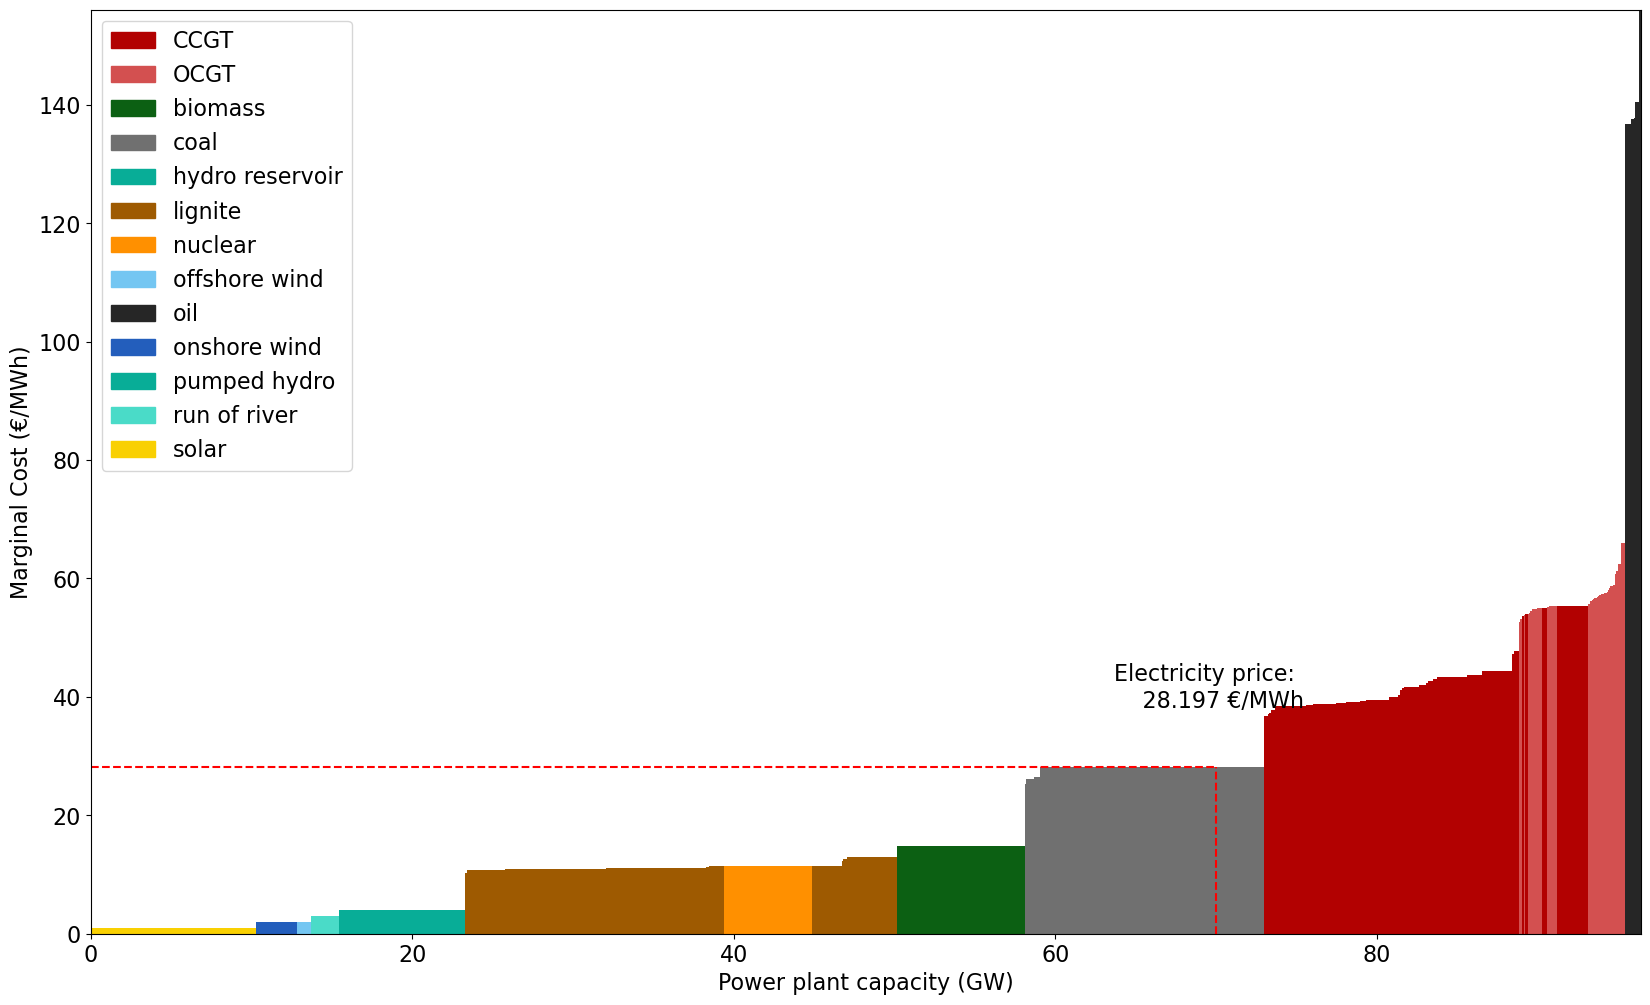

In [112]:
# i: Merit order with marginal costs as in dataset (and a demand of 170000 MW)
# Setting up data to fit tutorial functions
df = copy.copy(plants) # Copy helps to protect original data from unwanted manipulation
df.loc[:, "Available capacity (MW)"] = df.loc[:, "p_max_pu"]*df.loc[:, "p_nom"]/1000 # Available capacity
df_capa = df.groupby(["carrier", "marginal_cost", "efficiency"]).agg({"Available capacity (MW)":"sum"}) # Grouping by power plants with similar properties
df_capa.loc[:, "co2_emissions"] = df_capa.index.map(lambda x: techs.loc[x[0],"co2_emissions"]) # Adding a column containing co2 emissions based on tech table
df_capa.sort_values(by = "marginal_cost", ascending = True, inplace = True) # Sorting is important here so that the Cumulative capacity can be calculated correctly
df_capa.loc[:, "Cumulative capacity (MW)"] = df_capa.loc[:, "Available capacity (MW)"].cumsum()
df_capa.loc[:, "color"] = df_capa.index.map(lambda x: techs.loc[x[0],"color"]) #Again adding color data from tech
df_marg = df_capa.reset_index() # resetting index since groupby.agg returns multiindex dataframe
merit_order(df=df_marg, demand=70, power_plants=carriers.index, x_pos_col="Cumulative capacity (MW)", cost_type="marginal_cost")# calling merit order functionality


[2 points] ii. with an added carbon price of 80 €/tCO2 (assume that previously no carbon pricing was included)

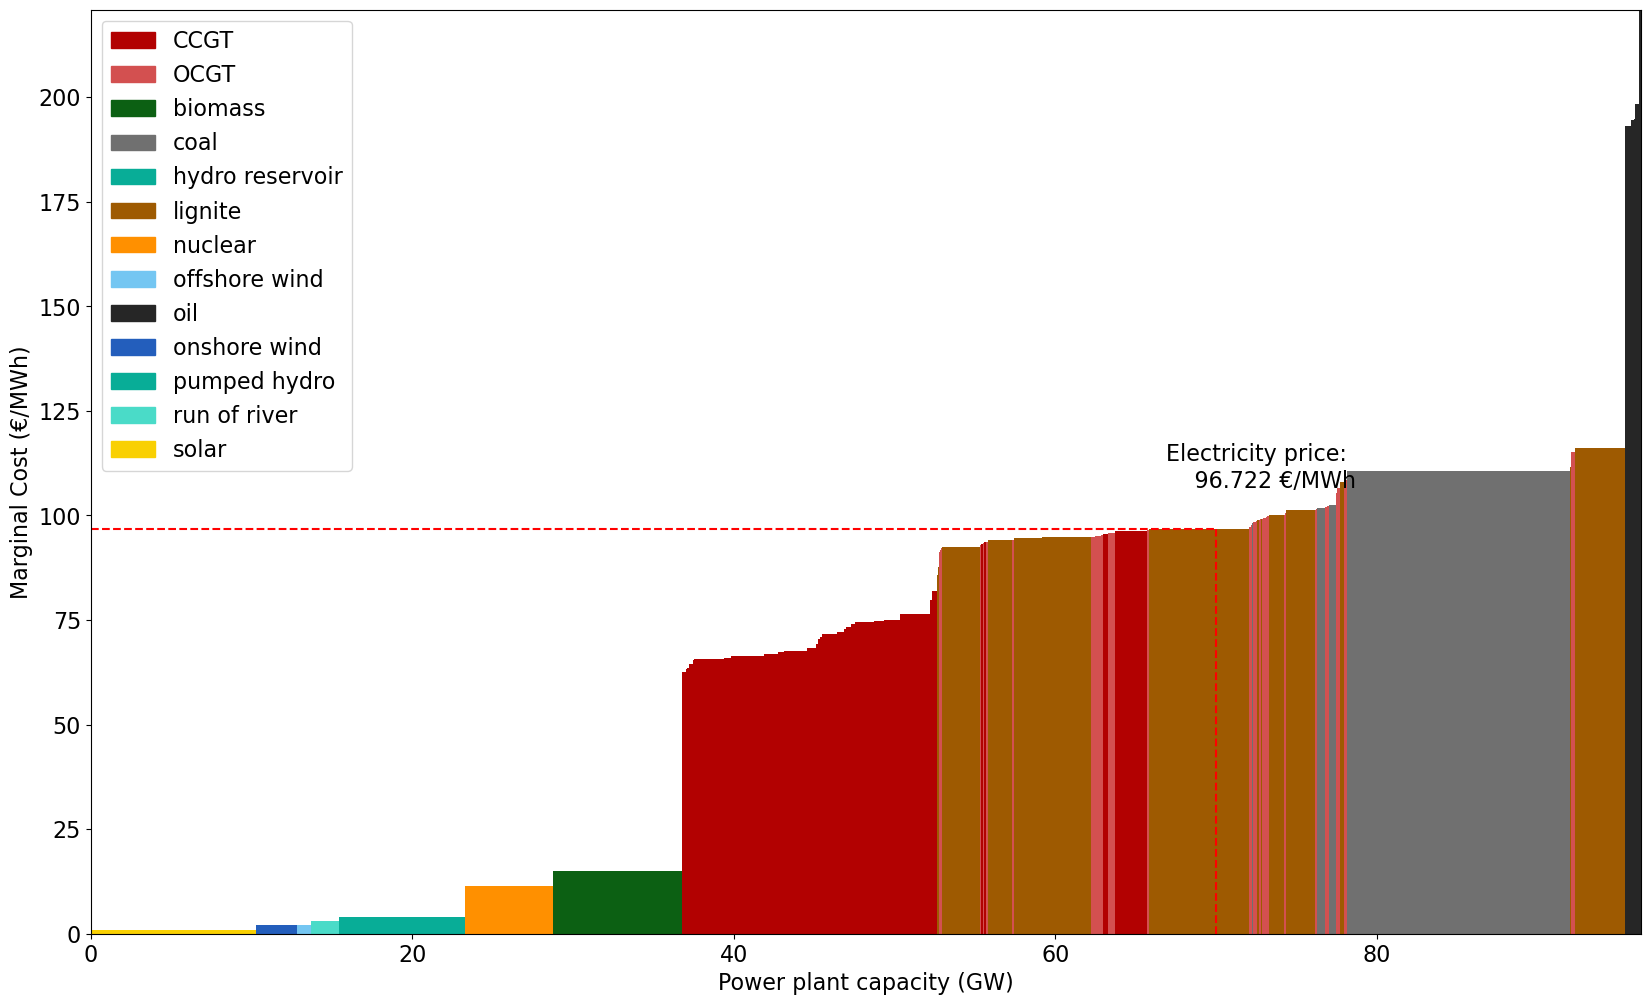

In [113]:
# merit_order(df=df, demand=70000, power_plants=carriers.index, x_pos_col="Cumulative capacity (MW)", cost_type="marginal_co2_costs")
# For comments please refer to cell above. Code here is very repetitive, yet I was not able to find a simple and fast solution to integrate some preprocessing into the function (sorry)
# I understood that the function should mainly do the plotting functionality, and therefore I did not put to many effort into integrating Data-preprocessing and manipulation (I hope this is within the task scope)

df = copy.copy(plants)
df.loc[:, "Available capacity (MW)"] = df.loc[:, "p_max_pu"]*df.loc[:, "p_nom"]/1000
df_capa = df.groupby(["carrier", "marginal_cost", "efficiency"]).agg({"Available capacity (MW)":"sum"})
df_capa.loc[:, "color"] = df_capa.index.map(lambda x: techs.loc[x[0],"color"])
df_capa.loc[:, "co2_emissions"] = df_capa.index.map(lambda x: techs.loc[x[0],"co2_emissions"])
df_capa = df_capa.reset_index()
df_capa.loc[:, "marginal_co2_costs"] = df_capa.loc[:, "marginal_cost"]+ df_capa.loc[:,"co2_emissions"]*80/df_capa.loc[:,"efficiency"] # Calculating "new" costs with co2
df_capa.sort_values(by = "marginal_co2_costs", ascending = True, inplace = True)
df_capa.loc[:, "Cumulative capacity (MW)"] = df_capa.loc[:, "Available capacity (MW)"].cumsum()
df_co2 = df_capa
merit_order(df=df_co2, demand=70, power_plants=carriers.index, x_pos_col="Cumulative capacity (MW)", cost_type="marginal_co2_costs")

[2 points] iii. additionally to ii. with a gas price increased by 50 €/MWh𝑡ℎ

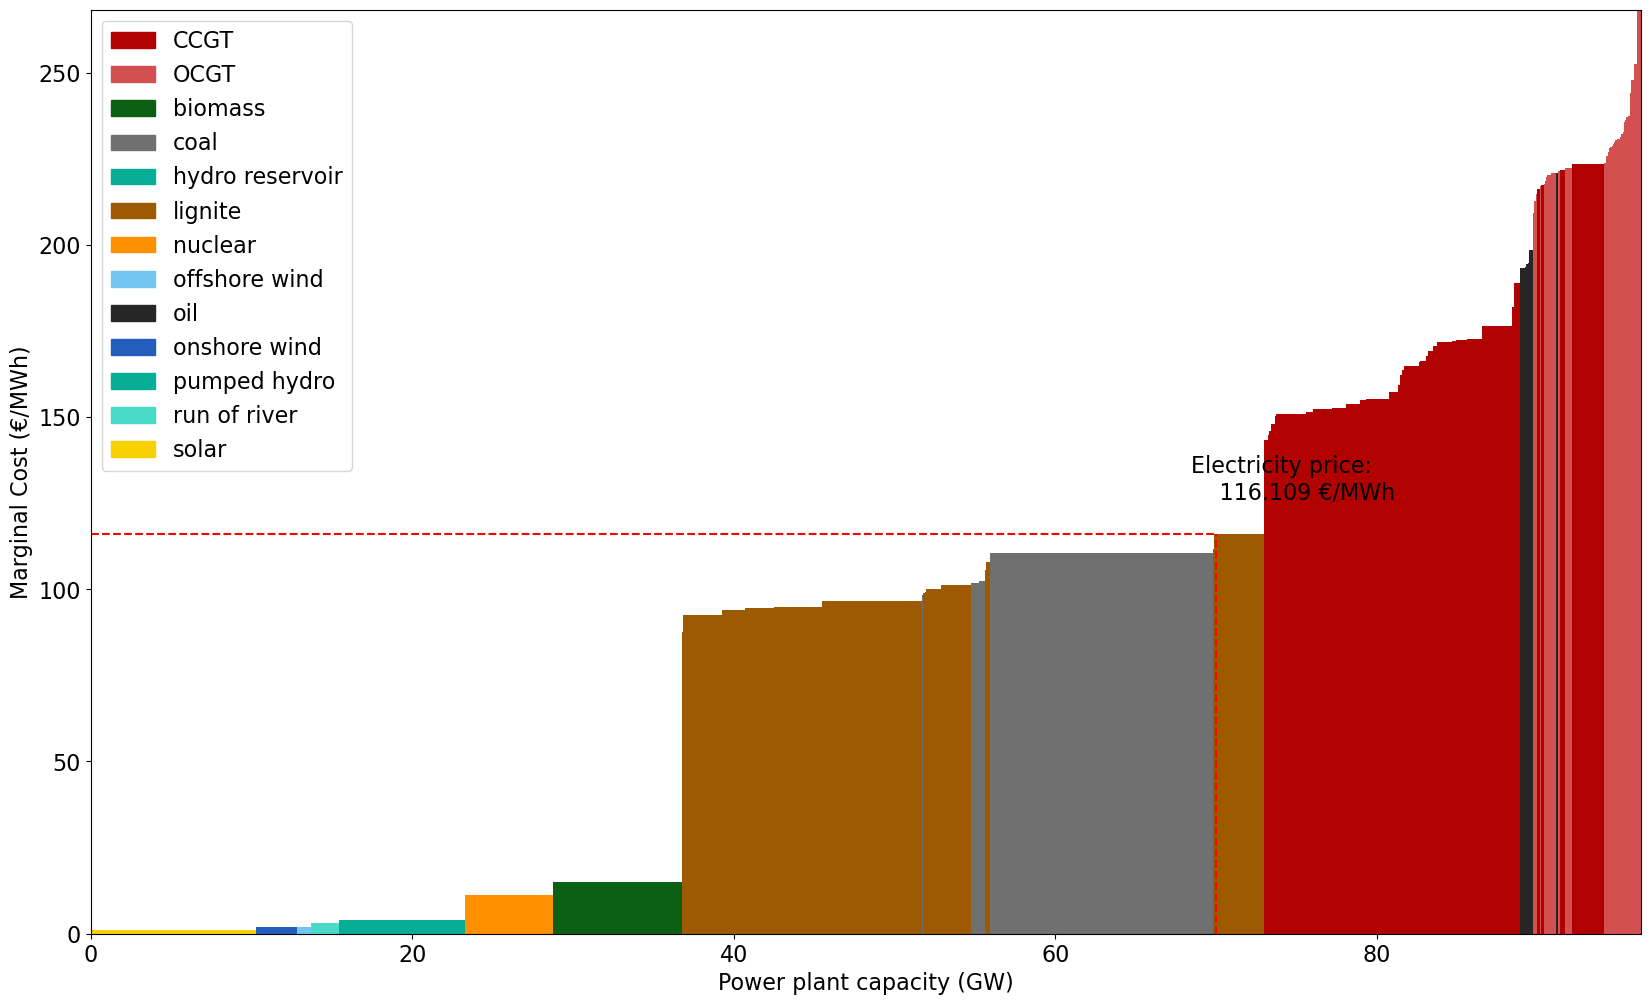

In [115]:
# For comments please refer to cell above. Code here is very repetitive (sorry)
df = copy.copy(plants)
df.loc[:, "Available capacity (MW)"] = df.loc[:, "p_max_pu"]*df.loc[:, "p_nom"]/1000
df_capa = df.groupby(["carrier", "marginal_cost", "efficiency"]).agg({"Available capacity (MW)":"sum"})
df_capa.loc[:, "color"] = df_capa.index.map(lambda x: techs.loc[x[0],"color"])
df_capa.loc[:, "co2_emissions"] = df_capa.index.map(lambda x: techs.loc[x[0],"co2_emissions"])
df_capa = df_capa.reset_index()
df_capa.loc[:, "marginal_co2_costs"] = df_capa.loc[:, "marginal_cost"]+ df_capa.loc[:,"co2_emissions"]*80/df_capa.loc[:,"efficiency"]
df_capa.loc[:, "gas"] = df_capa.carrier.map(lambda x: 50 if x=="OCGT" or x =="CCGT" else 0) # Costs are only applied to gas power plants (CCGT and OCGT)
df_capa.loc[:, "marginal_co2_costs_with_gas_increase"] = df_capa.loc[:, "marginal_co2_costs"]+ df_capa.loc[:,"gas"]/df_capa.loc[:,"efficiency"]  # New cost with CO2 and gas
df_capa.sort_values(by = "marginal_co2_costs_with_gas_increase", ascending = True, inplace = True)
df_capa.loc[:, "Cumulative capacity (MW)"] = df_capa.loc[:, "Available capacity (MW)"].cumsum()
df_co2_gas = df_capa
# Calling plotting functionality
merit_order(df=df_co2_gas, demand=70, power_plants=carriers.index, x_pos_col="Cumulative capacity (MW)", cost_type="marginal_co2_costs_with_gas_increase")

[2 points] iv. additionally to ii. and iii. without Germany’s nuclear power plant fleet

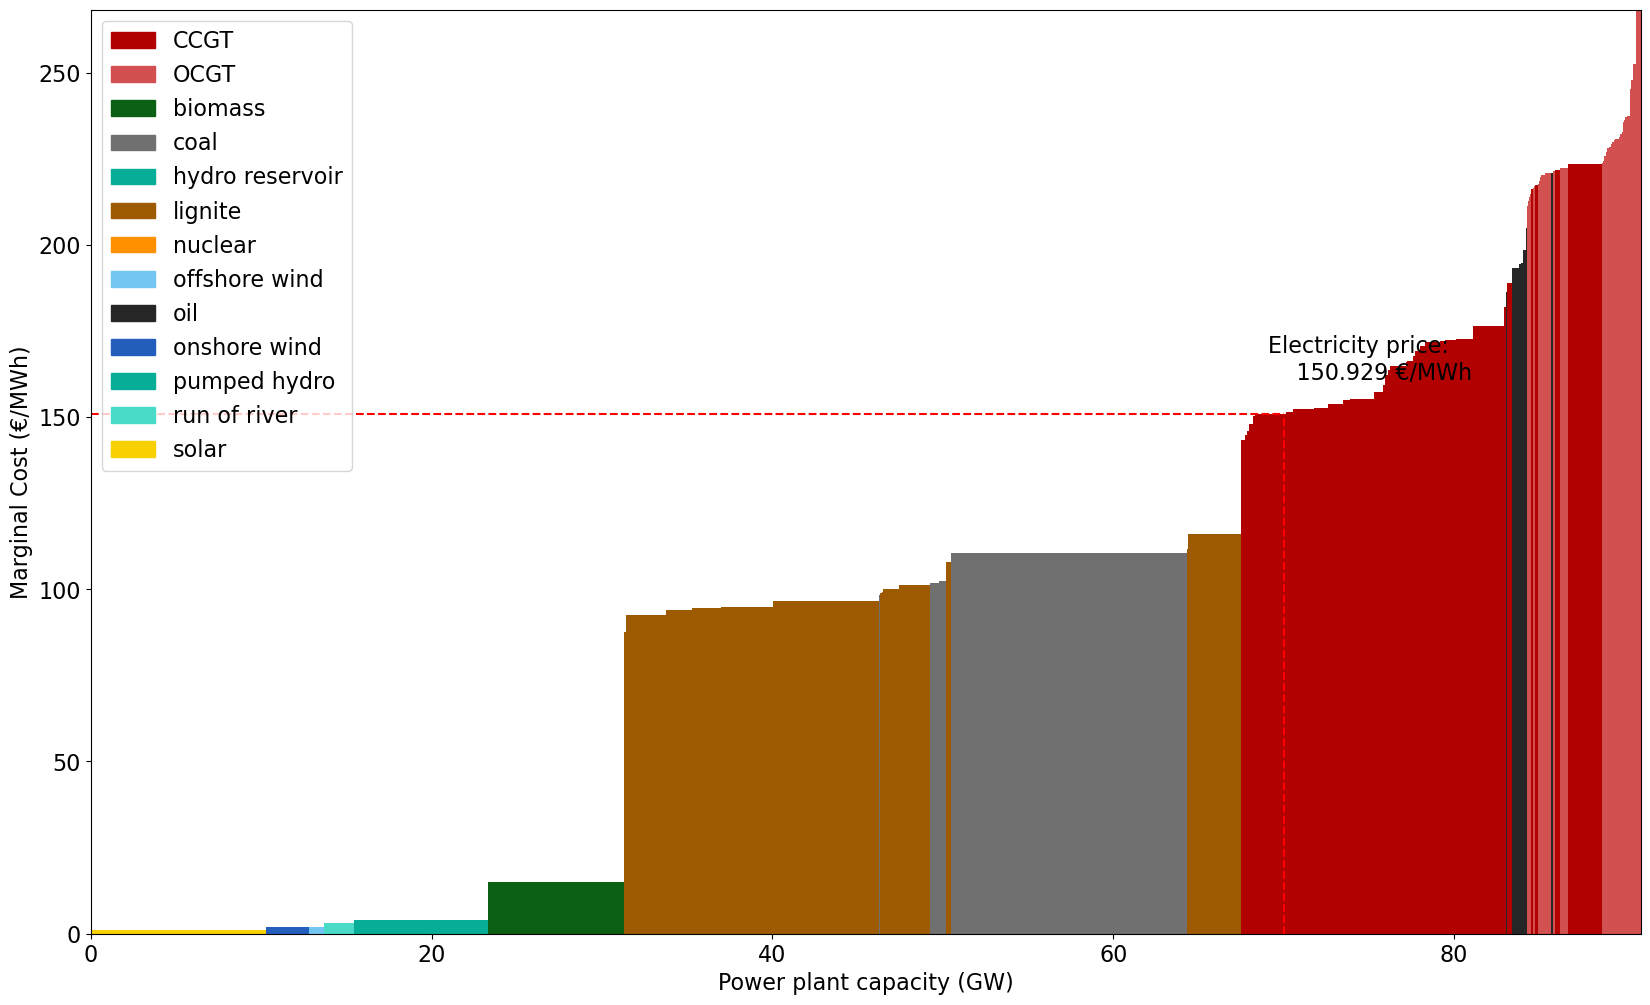

In [120]:
# For comments please reffer to cell above. Code here is very repetitive (sorry)
df = copy.copy(plants)
df.loc[:, "Available capacity (MW)"] = df.loc[:, "p_max_pu"]*df.loc[:, "p_nom"]/1000
df_capa = df.groupby(["carrier", "marginal_cost", "efficiency"]).agg({"Available capacity (MW)":"sum"})
df_capa.loc[:, "color"] = df_capa.index.map(lambda x: techs.loc[x[0],"color"])
df_capa.loc[:, "co2_emissions"] = df_capa.index.map(lambda x: techs.loc[x[0],"co2_emissions"])
df_capa = df_capa.reset_index()
index_names = df_capa[ df_capa['carrier'] == "nuclear" ].index #Getting index names with nuclear plants
df_capa.drop(index_names, inplace = True) #removing nuclear power index names
df_capa.loc[:, "marginal_co2_costs"] = df_capa.loc[:, "marginal_cost"]+ df_capa.loc[:,"co2_emissions"]*80/df_capa.loc[:,"efficiency"]
df_capa.loc[:, "gas"] = df_capa.carrier.map(lambda x: 50 if x=="OCGT" or x =="CCGT" else 0)
df_capa.loc[:, "marginal_co2_costs_with_gas_increase"] = df_capa.loc[:, "marginal_co2_costs"]+ df_capa.loc[:,"gas"]/df_capa.loc[:,"efficiency"]
df_capa.sort_values(by = "marginal_co2_costs_with_gas_increase", ascending = True, inplace = True)
df_capa.loc[:, "Cumulative capacity (MW)"] = df_capa.loc[:, "Available capacity (MW)"].cumsum()
df_nuc = df_capa
merit_order(df=df_nuc, demand=70, power_plants=carriers.index, x_pos_col="Cumulative capacity (MW)", cost_type="marginal_co2_costs_with_gas_increase")

#### (e) For each of the cases, use code to determine for an electricity demand of 70 GW
[4 points] i. the market clearing price

[2 points] ii. the total power dispatched per technology

[2 points] iii. the resulting revenue per technology

[2 points] iv. the operational costs per technology

[2 points] v. the profits per technology

[4 points] vi. the carbon intensity of the system

In [121]:
demand = 70
def rest_df(df, demand):
    return df.loc[:cut_off(demand=demand, df = df), :]

#Deleting the rest of the Dataframes with unused powerplants.
df_rest = rest_df(df_marg, demand=demand) #just the marginal cost
df_co2_rest = rest_df(df_co2, demand=demand) #with co2 price of 80€/t
df_co2_gas_rest = rest_df(df_co2_gas, demand=demand) #with co2 price and gas price increase
df_nuc_rest = rest_df(df_nuc, demand=demand) #with co2 price, gas price increase and without nuclear power

rest_set = [[df_rest, "marginal_cost", "including only marginal costs", "Marginal costs"],
            [df_co2_rest, "marginal_co2_costs", "including CO2 prices of 80€/t", "Co2 Price"],
            [df_co2_gas_rest,"marginal_co2_costs_with_gas_increase", "including CO2 prices of 80€/t and increased Gas prices by 50€/MWHt", "Gas price"],
            [df_nuc_rest, "marginal_co2_costs_with_gas_increase", "including CO2 prices of 80€/t and increased Gas prices by 50€/MWHt and excluding nuclear power plants", "Nuclear"]]
# i. the market clearing price
for data in rest_set:
    market_price = data[0].iloc[-1][data[1]]
    print(f"The market clearing price is {round(market_price, 3)} €/MWh for {data[2]}")



The market clearing price is 28.197 €/MWh for including only marginal costs
The market clearing price is 96.722 €/MWh for including CO2 prices of 80€/t
The market clearing price is 116.109 €/MWh for including CO2 prices of 80€/t and increased Gas prices by 50€/MWHt
The market clearing price is 150.929 €/MWh for including CO2 prices of 80€/t and increased Gas prices by 50€/MWHt and excluding nuclear power plants


Text(0.02, 0.5, 'Total power dispatched [GWh]')

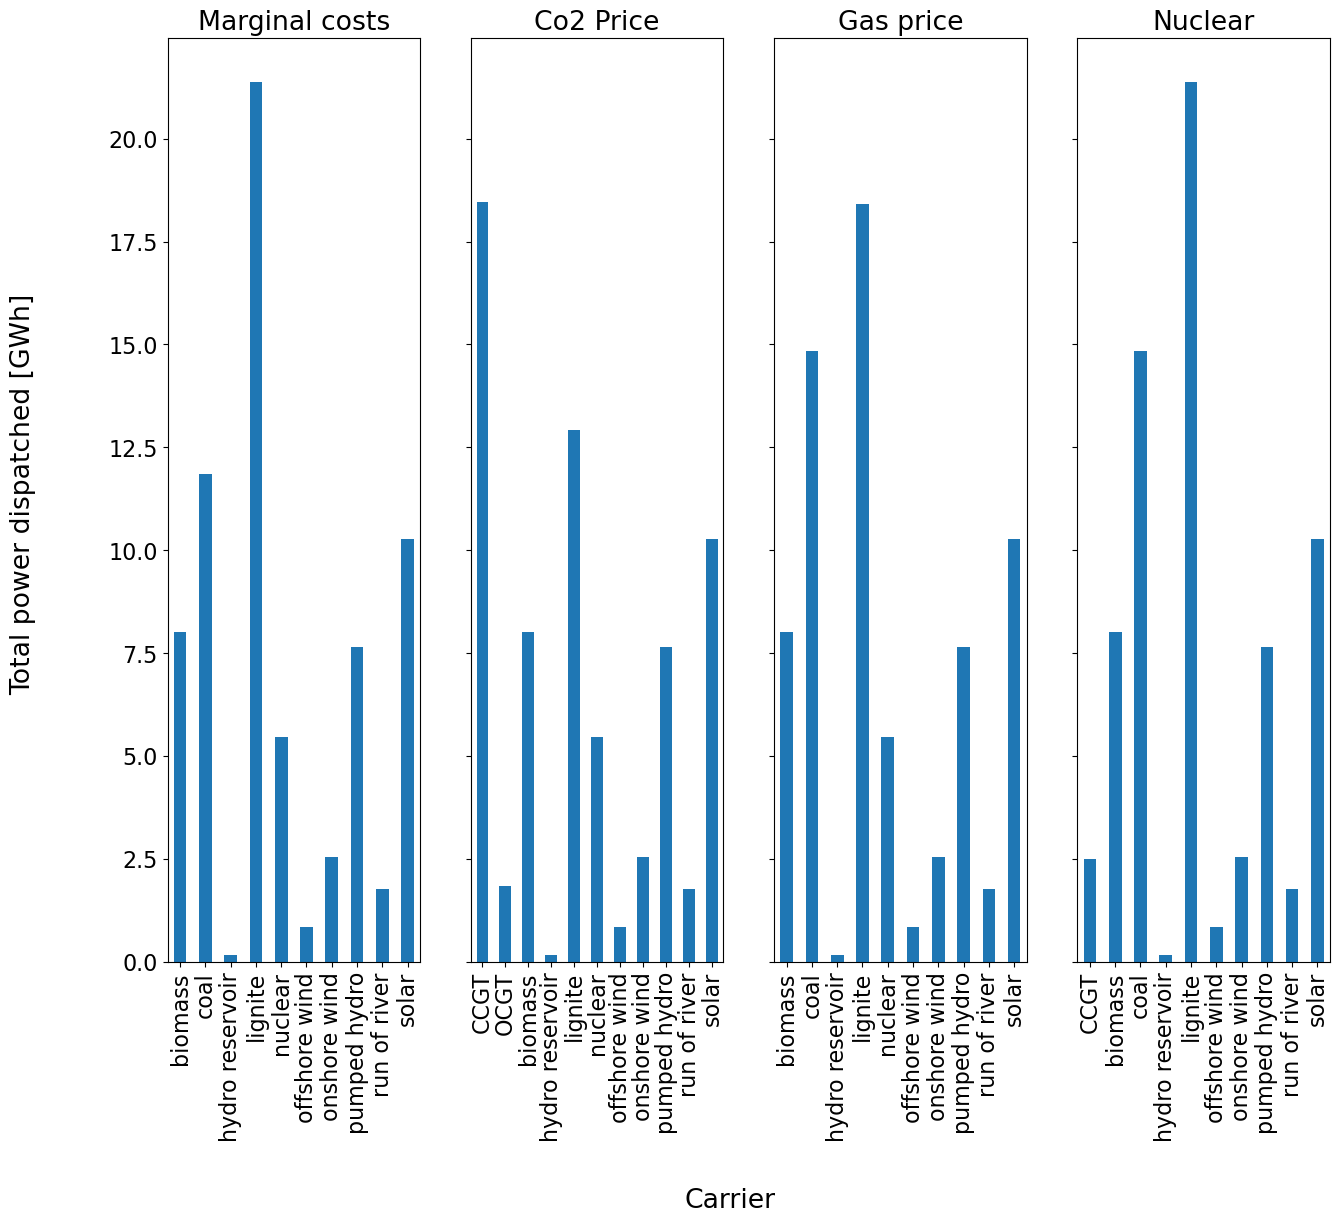

In [124]:
# ii. the total power dispatched per technology
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 12), sharey="all")
for data, ax in zip(rest_set, axs.ravel()):
    plot_data = pd.DataFrame(columns = ["Total dispatched Energy [MWh]"])
    energy = data[0].groupby(["carrier"]).agg({"Available capacity (MW)":"sum"})
    last_carrier = data[0].iloc[-1]["carrier"]
    last_energy = data[0].iloc[-1]["Cumulative capacity (MW)"]-demand
    energy.loc[last_carrier,:] = energy.loc[last_carrier,:]-last_energy
    for i in energy.index:
        plot_data.loc[i, "Total dispatched Energy [MWh]"] = energy.loc[i,:].values[0]
        # please uncomment line below if additional scalar values are wanted!
        #print(f"When {data[2]}, the total dispatched energy for technology {i} is {round(energy.loc[i,:].values[0],3)} MWh")
    plot_data.plot.bar(title = data[3],  legend=False, ax = ax)
fig.supxlabel("Carrier", y = -0.1)
fig.supylabel("Total power dispatched [GWh]")


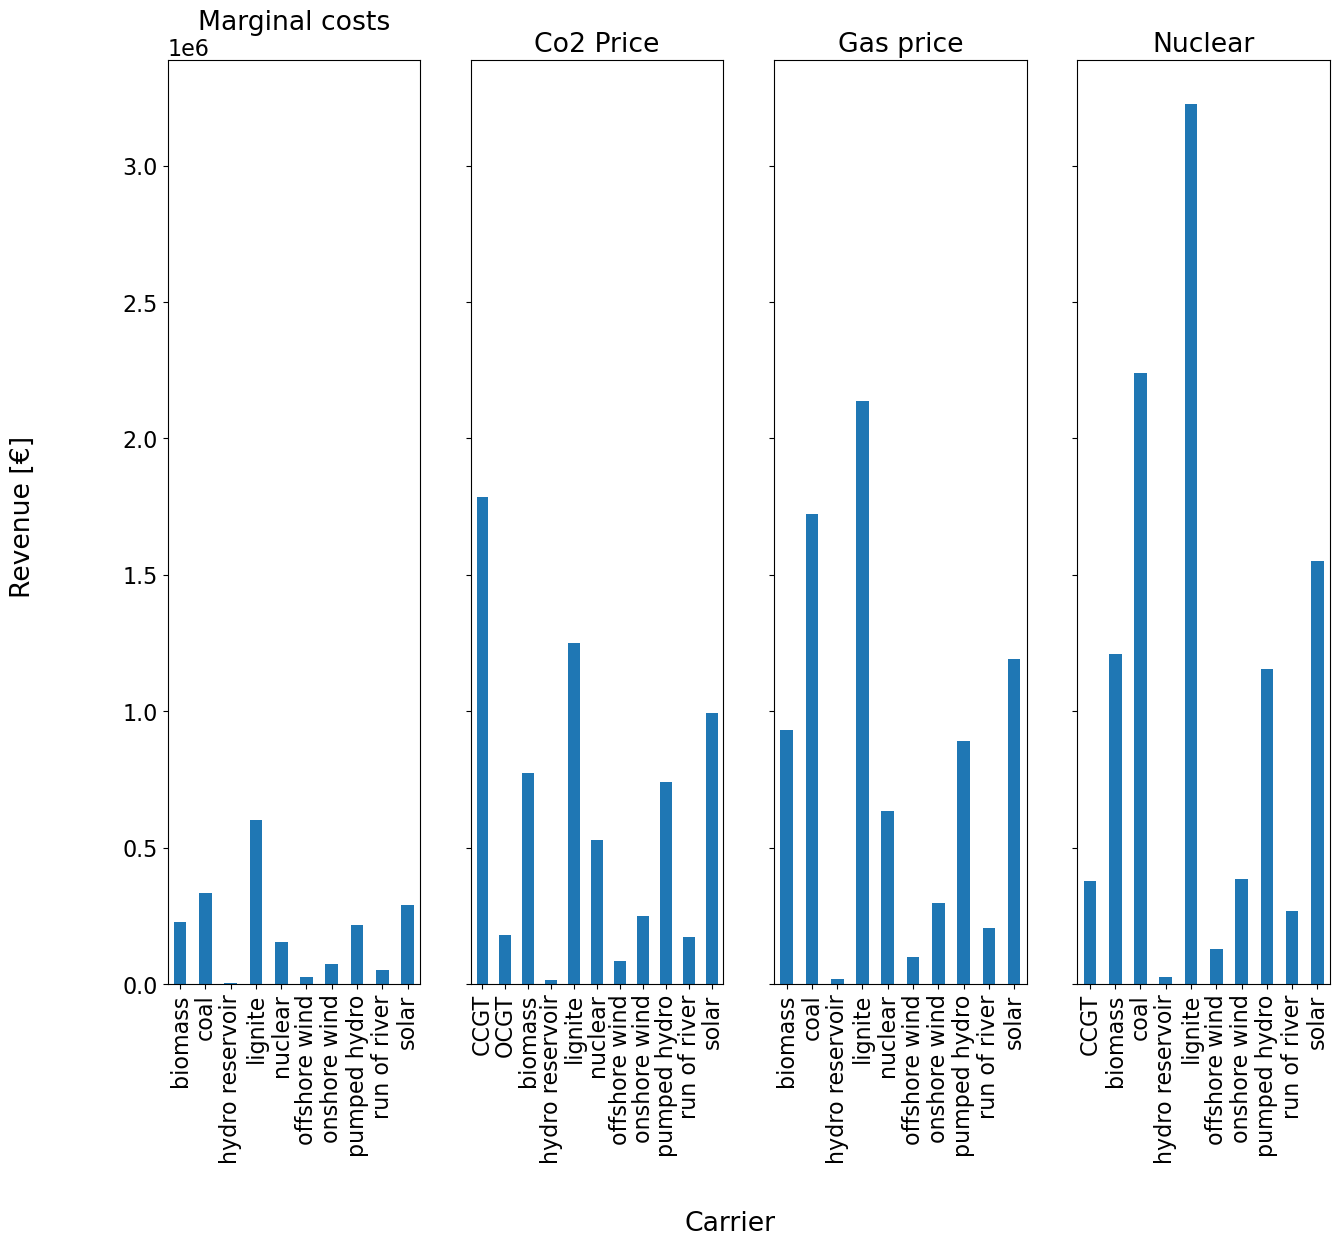

In [125]:
# iii. the resulting revenue per technology
# Revenue is: market clearing price * dispatched energy (per tech)
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 12), sharey="all")
for data, ax in zip(rest_set, axs.ravel()):
    plot_data = pd.DataFrame(columns = ["Revenue"])
    market_price = data[0].iloc[-1][data[1]]*1000
    energy = data[0].groupby(["carrier"]).agg({"Available capacity (MW)":"sum"})
    last_carrier = data[0].iloc[-1]["carrier"]
    last_energy = data[0].iloc[-1]["Cumulative capacity (MW)"]-demand
    energy.loc[last_carrier,:] = energy.loc[last_carrier,:]-last_energy
    for i in energy.index:
        plot_data.loc[i, "Revenue"] = energy.loc[i,:].values[0]*market_price
        # please uncomment line below if additional scalar values are wanted!
        #print(f"When {data[2]}, the revenue for technology {i} is {round(energy.loc[i,:].values[0]*market_price,3)}€")
        plot_data.plot.bar(title = data[3],  legend=False, ax = ax)
    fig.supxlabel("Carrier", y = -0.1)
    fig.supylabel("Revenue [€]")

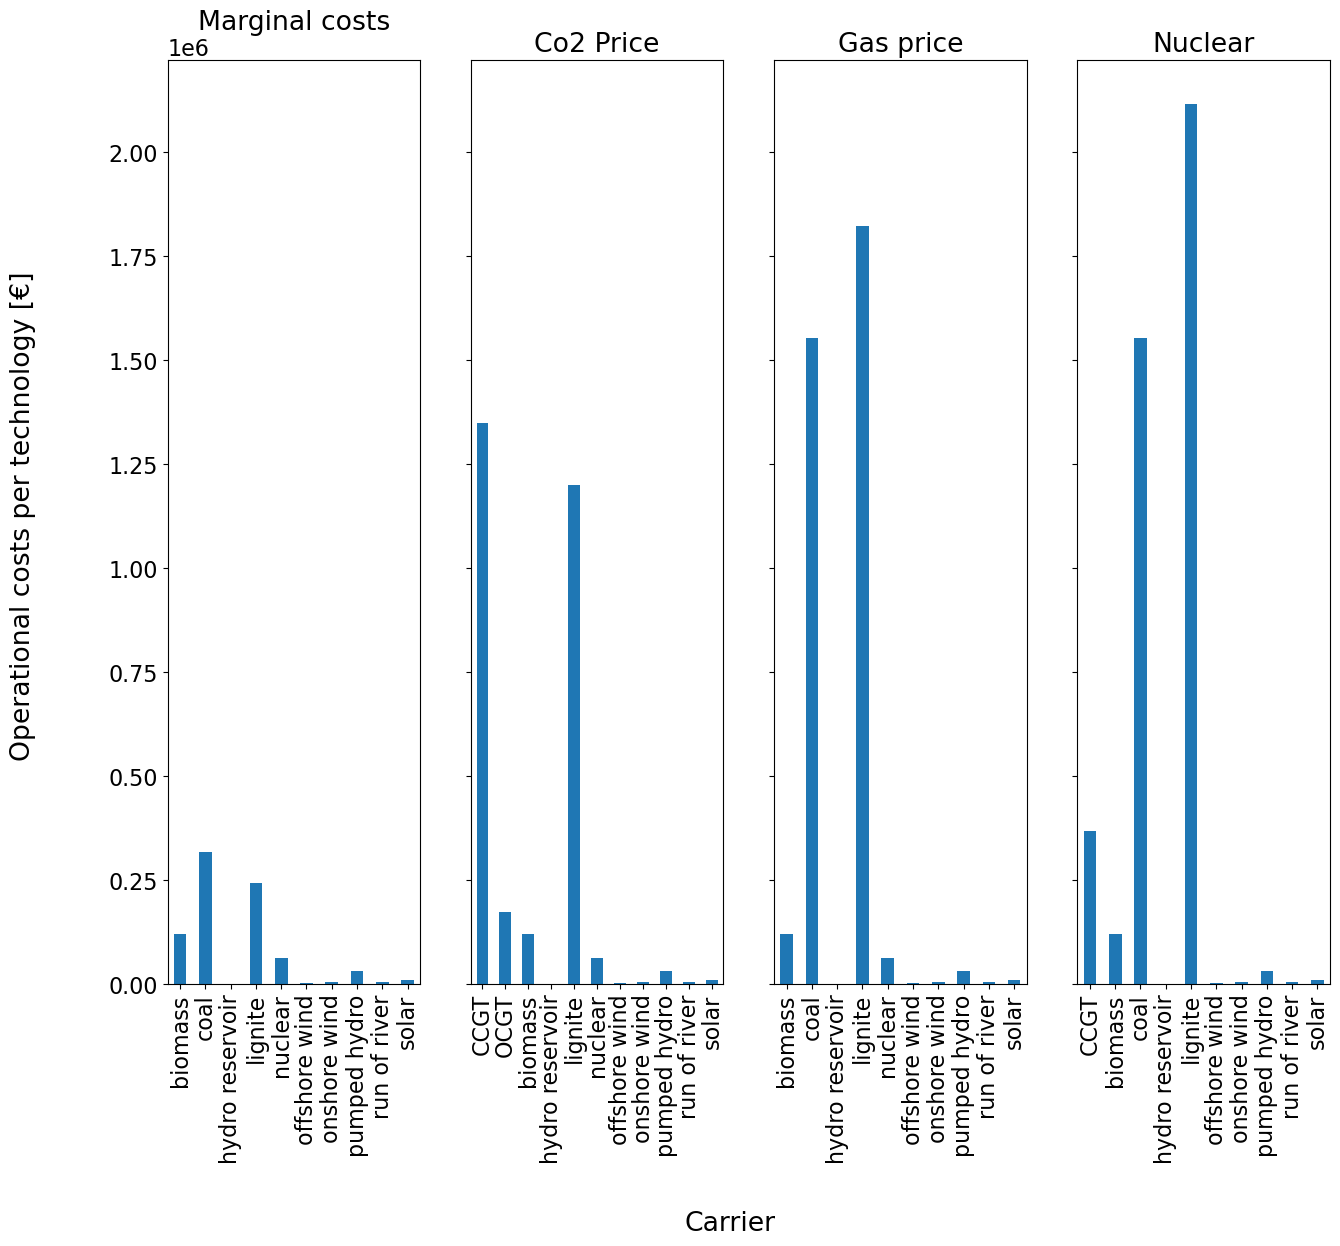

In [126]:
#iv. the operational costs per technology
# operational cost is: marginal cost (per tech) * dispatched energy (per tech)
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 12), sharey="all")
for data, ax in zip(rest_set, axs.ravel()):
    plot_data = pd.DataFrame(columns=["costs"])
    market_price = data[0].iloc[-1][data[1]]
    energy = data[0].groupby(["carrier"]).agg({"Available capacity (MW)":"sum"})
    costs = data[0].groupby(["carrier"]).agg({data[1]:"mean"})*1000
    last_carrier = data[0].iloc[-1]["carrier"]
    last_energy = data[0].iloc[-1]["Cumulative capacity (MW)"]-demand
    energy.loc[last_carrier,:] = energy.loc[last_carrier,:]-last_energy
    for i in energy.index:
        plot_data.loc[i, "costs"] = energy.loc[i,:].values[0]*costs.loc[i, :].values[0]
        # please uncomment line below if additional scalar values are wanted!
        #print(f"When {data[2]}, the operational cost for technology {i} is {round(energy.loc[i,:].values[0]*costs.loc[i, :].values[0],3)}€")
    plot_data.plot.bar(title = data[3],  legend=False, ax = ax)
    fig.supxlabel("Carrier", y = -0.1)
    fig.supylabel("Operational costs per technology [€]")

plt.show()




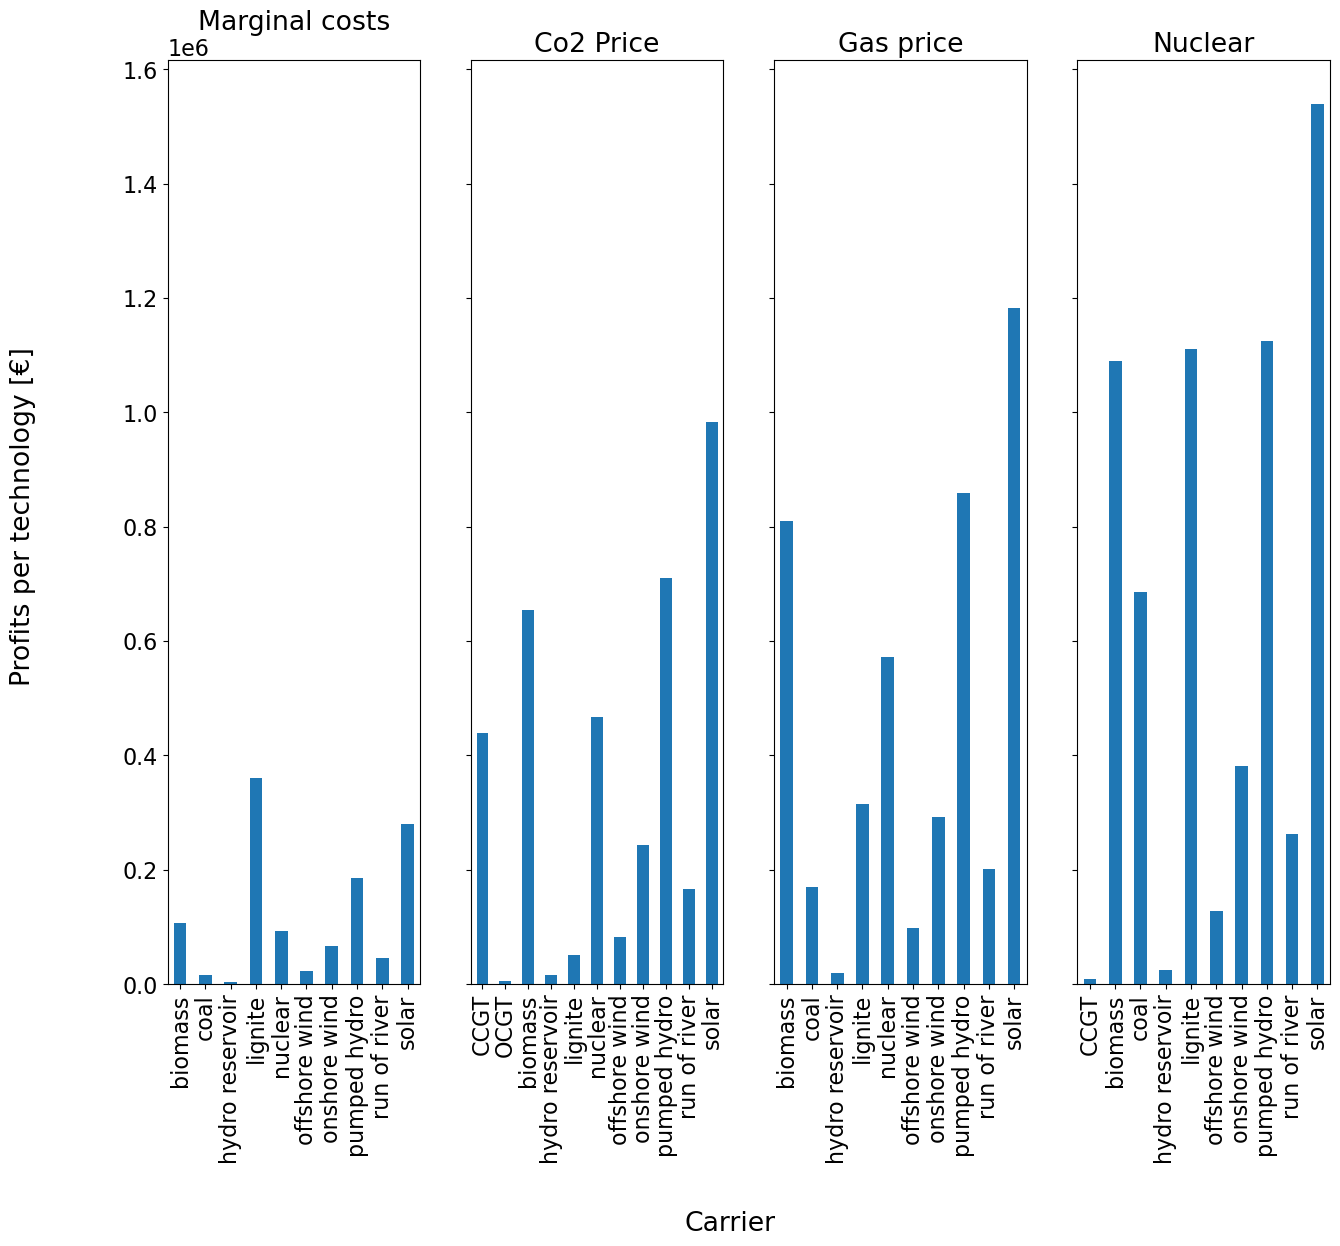

In [71]:
#v. the profits per technology
# Profit is: revenue(per tech)-cost(per tech)
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 12), sharey="all")
for data, ax in zip(rest_set, axs.ravel()):
    plot_data = pd.DataFrame(columns= ["profits"])
    market_price = data[0].iloc[-1][data[1]]
    energy = data[0].groupby(["carrier"]).agg({"Available capacity (MW)":"sum"})
    costs = data[0].groupby(["carrier"]).agg({data[1]:"mean"})
    last_carrier = data[0].iloc[-1]["carrier"]
    last_energy = data[0].iloc[-1]["Cumulative capacity (MW)"]-demand
    energy.loc[last_carrier,:] = energy.loc[last_carrier,:]-last_energy
    for i in energy.index:
        plot_data.loc[i, "profits"] = energy.loc[i,:].values[0]*market_price-energy.loc[i,:].values[0]*costs.loc[i, :].values[0]
        # please uncomment line below if additional scalar values are wanted!
        #print(f"When {data[2]}, the profit for technology {i} is {round(energy.loc[i,:].values[0]*market_price-energy.loc[i,:].values[0]*costs.loc[i, :].values[0],3)}€")
    plot_data.plot.bar(title = data[3],  legend=False, ax = ax)
fig.supxlabel("Carrier", y = -0.1)
fig.supylabel("Profits per technology [€]")
plt.show()


When including only marginal costs the carbon emission for the system is 12794.79t with 0.183 t/MWh
When including CO2 prices of 80€/t the carbon emission for the system is 9359.886t with 0.134 t/MWh
When including CO2 prices of 80€/t and increased Gas prices by 50€/MWHt the carbon emission for the system is 12586.595t with 0.18 t/MWh
When including CO2 prices of 80€/t and increased Gas prices by 50€/MWHt and excluding nuclear power plants the carbon emission for the system is 14304.78t with 0.204 t/MWh


<AxesSubplot: title={'center': 'Carbon intensity of the System'}, xlabel='Carrier', ylabel='System Co2 Emissions [t]'>

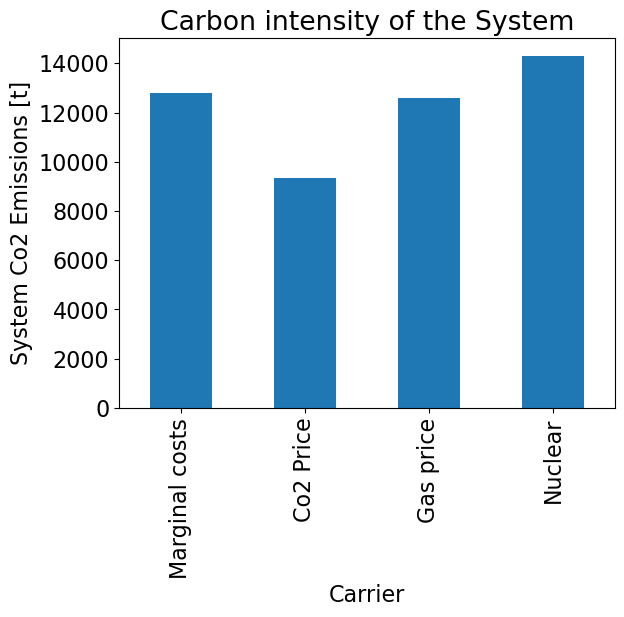

In [34]:
#vi. the carbon intensity of the system
plot_data = pd.DataFrame(columns = ["co2"])
for data in rest_set:
    market_price = data[0].iloc[-1][data[1]]
    data[0].loc[:, "co2_abs"] = data[0].loc[:, "co2_emissions"] * data[0].loc[:, "Available capacity (MW)"] #(tco2/MWh)*MWh<->tco2
    carbon = data[0].groupby(["carrier"]).agg({"co2_abs":"sum"})
    last_carrier = data[0].iloc[-1]["carrier"]
    rest_co2 = (data[0].iloc[-1]["Cumulative capacity (MW)"]-demand)*data[0].iloc[-1]["co2_emissions"]
    carbon.loc[last_carrier,:] = carbon.loc[last_carrier,:]-rest_co2
    print(f"When {data[2]} the carbon emission for the system is {round(carbon.sum().values[0],3)}t with {round(carbon.sum().values[0]/demand, 3)} t/MWh")
    plot_data.loc[data[3], "co2"] = carbon.sum().values[0]
plot_data.plot.bar(title = "Carbon intensity of the System", xlabel = "Carrier", ylabel = "System Co2 Emissions [t]", legend=False)


#### [4 points] (f) Describe the major differences you observe between the four cases.

In [89]:
print("The most significant points regarding the differences in energy systems are the prices for running them and the carbon emissions they produce. The only way to reduce carbon dioxide emissions is to implement a carbon price or tax.\n\n"
"Increasing the price of gas and removing nuclear power plants leads to higher carbon dioxide emissions due to a greater share of coal, which is the most carbon-intensive carrier in this example. The behavior of lignite is similar, but lignite is slightly cheaper in total (likely because coal has to be imported in most parts of Europe and the slightly higher co2 emissions). The carbon price has a significant effect on the electricity market, particularly for coal-fired power plants due to the high carbon dioxide emissions of coal.\n\n"
"Introducing additional prices like the gas and carbon dioxide emission prices increases the cost of electricity ('merit order costs'), leading to higher profits for power plants that are not affected by these measures (such as solar, wind, and biomass). The behavior of the merit order is also interesting when the carbon dioxide price is increased: gas-fired power plants suddenly become cheaper than coal, suggesting that the carbon dioxide emissions from coal-fired power plants are significantly higher than those from gas-fired power plants. However, if the price of gas is subsequently increased, gas-fired power plants become the most expensive in the market, as is currently the case in Europe due to the Russian invasion of Ukraine.\n\n"
"Overall, the revenues for some technologies almost double when they are not affected by the applied changes. For these unaffected technologies, costs will always stay the same, but revenues will increase as the costs of other technologies rise. It is also clear that the costs of renewable technologies are the lowest, leading to the highest profits and revenues when gas or carbon dioxide prices increase and even higher profits and revenues when nuclear power is removed from the system.\n\n")
#

The most significant points regarding the differences in energy systems are the prices for running them and the carbon emissions they produce. The only way to reduce carbon dioxide emissions is to implement a carbon price or tax.

Increasing the price of gas and removing nuclear power plants leads to higher carbon dioxide emissions due to a greater share of coal, which is the most carbon-intensive carrier in this example. The behavior of lignite is similar, but lignite is slightly cheaper in total (likely because coal has to be imported to Germany). The carbon price has a significant effect on the electricity market, particularly for coal-fired power plants due to the high carbon dioxide emissions of coal.

Introducing additional prices like the gas and carbon dioxide emission prices increases the cost of electricity ('merit order costs'), leading to higher profits for power plants that are not affected by these measures (such as solar, wind, and biomass). The behavior of the merit ord

## Task 3: Tools for Electricity Market Modelling [28 points]
##### Build a simple electricity market model for minimising operational costs within technical constraints for South Africa, Mozambique and Eswatini considering the following information:
The operational fleet of power plants in the three countries is specified as follows:

| Technology  | Country       | Marginal Cost [€/MWh]   | Capacity [MW]  |
|-------------|---------------|-------------------------|----------------|
| Coal        | South Africa  | 30                      | 35000          |
| Wind        | South Africa  | 0                       | 3000           |
| Gas         | South Africa  | 60                      | 8000           |
| Oil         | South Africa  | 80                      | 2000           |
| Hydro       | Mozambique    | 3                       | 1200           |
| Gas         | Mozambique    | 55                      | 500            |
| Hydro       | Eswatini      | 5                       | 600            |

The electricity demand in the countries reads as follows:

| Country      | Demand [MW]   |
|--------------|---------------|
| South Africa | 42000         |
| Mozambique   | 650           |
| Eswatini     | 250           |

The transmission capacities read as follows:

| Start        | End        | Capacity [MW]  |
|--------------|------------|----------------|
| South Africa | Mozambique | 500            |
| Mozambique   | Eswatini   | 100            |
| South Africa | Eswatini   | 250            |

Assume equal reactance for the transmission lines.

(a) Build and solve the problem using pyomo. You’ll need to:

[3 points] i. create all variables for generation and transmission,

[2 points] ii. formulate the objective function for minimising the operational costs,

[5 points] iii. build the necessary constraints, including the technical limits of generation and transmission
and the Kirchhoff Laws,

[2 points] iv. solve the optimisation model with a solver of your choice,

[3 points] v. retrieve the generator dispatch, power flows, objective function and market prices. Label
units!

In [5]:
import pyomo.environ as pe
# model = pe.ConcreteModel()
#
# Transmission capacity (interpreting as bidirectional)
ZA_MZ = 500
MZ_SZ = 100
ZA_SZ = 250

# Parameters from table
params = {"ZA": {
                    "capacity": {"Coal":35000, "Wind":3000, "Gas": 8000, "Oil": 2000},
                    "cost" :{"Coal":30, "Wind":0, "Gas": 60, "Oil": 80},
                    "demand": {"demand": 42000}, "x":25, "y":-30},
          "MZ": {
                    "capacity":{"Hydro":1200 , "Gas":50 },
                    "cost":{"Hydro":3 , "Gas":55},
                    "demand": {"demand":650}, "x":35, "y":-18},
          "SZ": {
                    "capacity":{"Hydro": 600},
                    "cost":{"Hydro":5},
                    "demand": {"demand":250}, "x":32, "y":-27}}

m = pe.ConcreteModel()
m.dual = pe.Suffix(direction=pe.Suffix.IMPORT)

m.countries = pe.Set(initialize=params.keys())

technologies = list(params["ZA"]["capacity"].keys() | params["MZ"]["capacity"].keys() | params["SZ"]["capacity"].keys())
m.technologies = pe.Set(initialize=technologies)
m.g = pe.Var(m.countries, m.technologies, within=pe.NonNegativeReals)



@m.Constraint(m.countries, m.technologies)
def generator_limit(m, c, s):
    return m.g[c,s] <= params[c]["capacity"].get(s, 0)

# Transmission bounds:
# Prefix definition: Power flowing from start to End will be negative (therefore will be subtracted at start and added at end point)
m.ZA_MZ = pe.Var(bounds = (-ZA_MZ, ZA_MZ))
m.MZ_SZ = pe.Var(bounds = (-MZ_SZ, MZ_SZ))
m.ZA_SZ = pe.Var(bounds = (-ZA_SZ, ZA_SZ))

# There is only one Cycle (adding cycle matrix and reactance matrix)
cycle_matrix = [1, # ZA_MZ
                -1, # ZA_SZ
                1, # MZ_SZ
]
# Adding reactance
x = 1
reactance_matrix = [x, # ZA_MZ
                x, # ZA_SZ
                x, # MZ_SZ
]
lines = [m.ZA_MZ, m.ZA_SZ, m.MZ_SZ]

# KCLor cycle
m.cycle = pe.Constraint(expr=sum(c*r*l for c, r, l in zip(cycle_matrix, reactance_matrix, lines)) == 0)

# Objective function:
m.cost = pe.Objective(expr=sum(params[c]["cost"].get(s, 0) * m.g[c,s] for s in m.technologies for c in m.countries))

# KCL for each node
@m.Constraint(m.countries)
def kcl(m, c):
    if c == "SZ":
        return sum(m.g[c,s] for s in m.technologies)   +m.MZ_SZ+m.ZA_SZ == params[c]["demand"]["demand"]
    elif c == "MZ":
        return sum(m.g[c,s] for s in m.technologies) -m.MZ_SZ +m.ZA_MZ == params[c]["demand"]["demand"]
    elif c == "ZA":
        return sum(m.g[c,s] for s in m.technologies) -m.ZA_MZ -m.ZA_SZ == params[c]["demand"]["demand"]
m.ZA_MZ.pprint()

print("Starting optimization...")
pe.SolverFactory('cbc').solve(m)
print("Optimization finished!")


ZA_MZ : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :  -500 :  None :   500 : False :  True :  Reals
Starting optimization...
    cbc


ApplicationError: No executable found for solver 'cbc'

In [183]:
# Generator dispatch:
se = pd.Series(m.g.get_values()).unstack()
gen_pyomo = se
df_MW = pd.DataFrame(se).rename(columns={"Coal": "Coal [MW]", "Gas": "Gas [MW]", "Hydro": "Hydro [MW]", "Oil": "Oil [MW]", "Wind": "Wind [MW]"})
df_MW

,Coal [MW],Gas [MW],Hydro [MW],Oil [MW],Wind [MW]
MZ,0.0,0.0,1100.0,0.0,0.0
SZ,0.0,0.0,400.0,0.0,0.0
ZA,35000.0,3400.0,0.0,0.0,3000.0


In [184]:
# power flows are (please note prefix definition from Cell 36)
print(f"From South Africa to Mozambique: {m.ZA_MZ()} MW")
print((f"From South Africa to Eswatini: {m.ZA_SZ()} MW"))
print(f"From Mozambique to Eswatini: {m.MZ_SZ()} MW")

From South Africa to Mozambique: -350.0 MW
From South Africa to Eswatini: -250.0 MW
From Mozambique to Eswatini: 100.0 MW


In [216]:
costs = {"ZA":{'Coal': 30, 'Wind': 0, 'Gas': 60, 'Oil': 80},
"MZ":{'Hydro': 3, 'Gas': 55},
"SZ":{'Hydro': 5}}
costs = pd.DataFrame(costs).T
df = pd.DataFrame(se)
costs_by_tech = df * costs
print(f"The costs by tech are [€] (NaN equals to 0):")
print(costs_by_tech)
print(f"While the electricity price within the combined bidding zone (with merit-order principle) would be {(costs_by_tech/df).max().max()} €/MWh")
print(f"And the electricity price within the singular bidding zones (with merit-order principle) would be [€(MWh]: \n"
      f"{(costs_by_tech/df).max(axis=1)}")
print(f"While the total amount of money spent is {m.cost()}")
costs_pyomo_combined = (costs_by_tech/df).max().max()
costs_pyomo_sing = (costs_by_tech/df).max(axis=1)

The costs by tech are [€] (NaN equals to 0):
         Coal       Gas   Hydro  Oil  Wind
MZ        NaN       0.0  3300.0  NaN   NaN
SZ        NaN       NaN  2000.0  NaN   NaN
ZA  1050000.0  204000.0     NaN  0.0   0.0
While the electricity price within the combined bidding zone (with merit-order principle) would be 60.0 €/MWh
And the electricity price within the singular bidding zones (with merit-order principle) would be [€(MWh]: 
MZ     3.0
SZ     5.0
ZA    60.0
dtype: float64
While the total amount of money spent is 1259300.0


In [188]:
print("The objective after solving the problem is: ")
cost_pyomo = m.cost()
cost_pyomo

The objective after solving the problem is: 


1259300.0

#### (b) Build and solve the same problem in PyPSA. You’ll need to:

[1 point] i. create a new network,

[5 points] ii. add the generators, lines, and loads to the network,

[2 points] iii. solve the built network with a solver of your choice,

[3 points] iv. retrieve the generator dispatch, power flows, objective function and market prices. Label
units!

In [179]:
import pypsa
n = pypsa.Network()
params = {"ZA": {
                    "capacity": {"Coal":35000, "Wind":3000, "Gas": 8000, "Oil": 2000},
                    "cost" :{"Coal":30, "Wind":0, "Gas": 60, "Oil": 80},
                    "demand": {"demand": 42000}, "x":25, "y":-30},
          "MZ": {
                    "capacity":{"Hydro":1200 , "Gas":50 },
                    "cost":{"Hydro":3 , "Gas":55},
                    "demand": {"demand":650}, "x":35, "y":-18},
          "SZ": {
                    "capacity":{"Hydro": 600},
                    "cost":{"Hydro":5},
                    "demand": {"demand":250}, "x":32, "y":-27}}

for country, cntr_dta  in params.items():
    n.add("Bus",
          name = country,
          #x = params[country]["x"],
          #y = params[country]["y"]
          )
    n.add("Load",
          name = str("Load"+country),
          bus = country,
          p_set=params[country]["demand"]["demand"])
    for carrier in params[country]["capacity"].keys():
        # Luckily since we only take look at one timestep we don't have to differentiate between volatile generation and "capacity" regulated Generators
        n.add("Generator",
                name = str(carrier)+"_"+str(country),
                bus = country,
                p_nom = params[country]["capacity"][carrier],
                marginal_cost = params[country]["cost"][carrier],

                # control = "PV",
              )

n.add("Line", bus0 = "ZA", bus1 = "MZ", name="ZA-MZ", s_nom = ZA_MZ, x = 1)
n.add("Line", bus0 = "ZA", bus1 = "SZ", name="ZA-SZ", s_nom = ZA_SZ, x = 1)
n.add("Line", bus0 = "MZ", bus1 = "SZ", name="MZ-SZ", s_nom = MZ_SZ, x = 1)
n.lopf(solver_name = "cbc")


INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 0.14s
INFO:pypsa.linopf:Solve linear problem using Cbc solver
INFO:pypsa.linopf:Optimization successful. Objective value: 1.26e+06


('ok', 'optimal')

In [176]:
print("Generators dispatch is [MW]: ")
gen_pypsa = n.generators_t.p
gen_pypsa

Generators dispatch is [MW]: 


Generator,Coal_ZA,Wind_ZA,Gas_ZA,Oil_ZA,Hydro_MZ,Gas_MZ,Hydro_SZ
snapshot,,,,,,,
now,35000,3000,3400,0,1100,0,400


In [177]:
print("Power flows are [MW]: ")
n.lines_t.p0

Power flows are [MW]: 


Line,ZA-MZ,ZA-SZ,MZ-SZ
snapshot,,,
now,-350,-250,100


In [189]:
print(f"While the total amount of money spent is {n.objective}")
cost_pypsa = n.objective


While the total amount of money spent is 1259300.0


In [265]:
marg_costs = n.generators.marginal_cost.T

print(f"While the electricity price within the combined bidding zone (with merit-order principle) would be [€/MWh]:{((marg_costs*n.generators_t.p)/n.generators_t.p).max(axis=1).iloc[0]}")
sing_marg = ((marg_costs*n.generators_t.p)/n.generators_t.p).T
sing_marg["country"] = [i.split("_")[1] for i in sing_marg.index]
sing_max = sing_marg.groupby("country").max()

print(f"And the electricity price within the singular bidding zones (with merit-order principle) would be [€(MWh]: \n"
      f"{sing_max}")

While the electricity price within the combined bidding zone (with merit-order principle) would be [€/MWh]:60.0
And the electricity price within the singular bidding zones (with merit-order principle) would be [€(MWh]: 
snapshot   now
country       
MZ         3.0
SZ         5.0
ZA        60.0


#### [2 points] (c) Check that both models yield the same generator dispatch, objective function, and market prices.

In [271]:
truth = [gen_pypsa.loc["now",i] == gen_pyomo.loc[i.split("_")[1], i.split("_")[0]] for i in gen_pypsa.columns]
print(f"Is resulting generator dispatch of both optimization methods the same? Answer: {truth}")
print(f"Are resulting costs of both optimization methods are the same? Answer: {cost_pypsa==cost_pyomo}")
print(f"Are the market prices for both models the same? Answer: If the Generator dispatch is the same for every generator the Market prices can not be different, "
      f"since the prices are calculated by dispatch(per technology)*price(per technology)"
      f"As expected the costs for technology for singular country bidding zone is the same for every country:")
print((costs_by_tech/df).max(axis=1) == sing_max["now"])


Is resulting generator dispatch of both optimization methods the same? Answer: [True, True, True, True, True, True, True]
Are resulting costs of both optimization methods are the same? Answer: True
Are the market prices for both models the same? Answer: If the Generator dispatch is the same for every generator the Market prices can not be different, since the prices are calculated by dispatch(per technology)*price(per technology)As expected the costs for technology for singular country bidding zone is the same for every country:
MZ    True
SZ    True
ZA    True
dtype: bool
